Creating Maria's Bakery Graphical LP Solution...


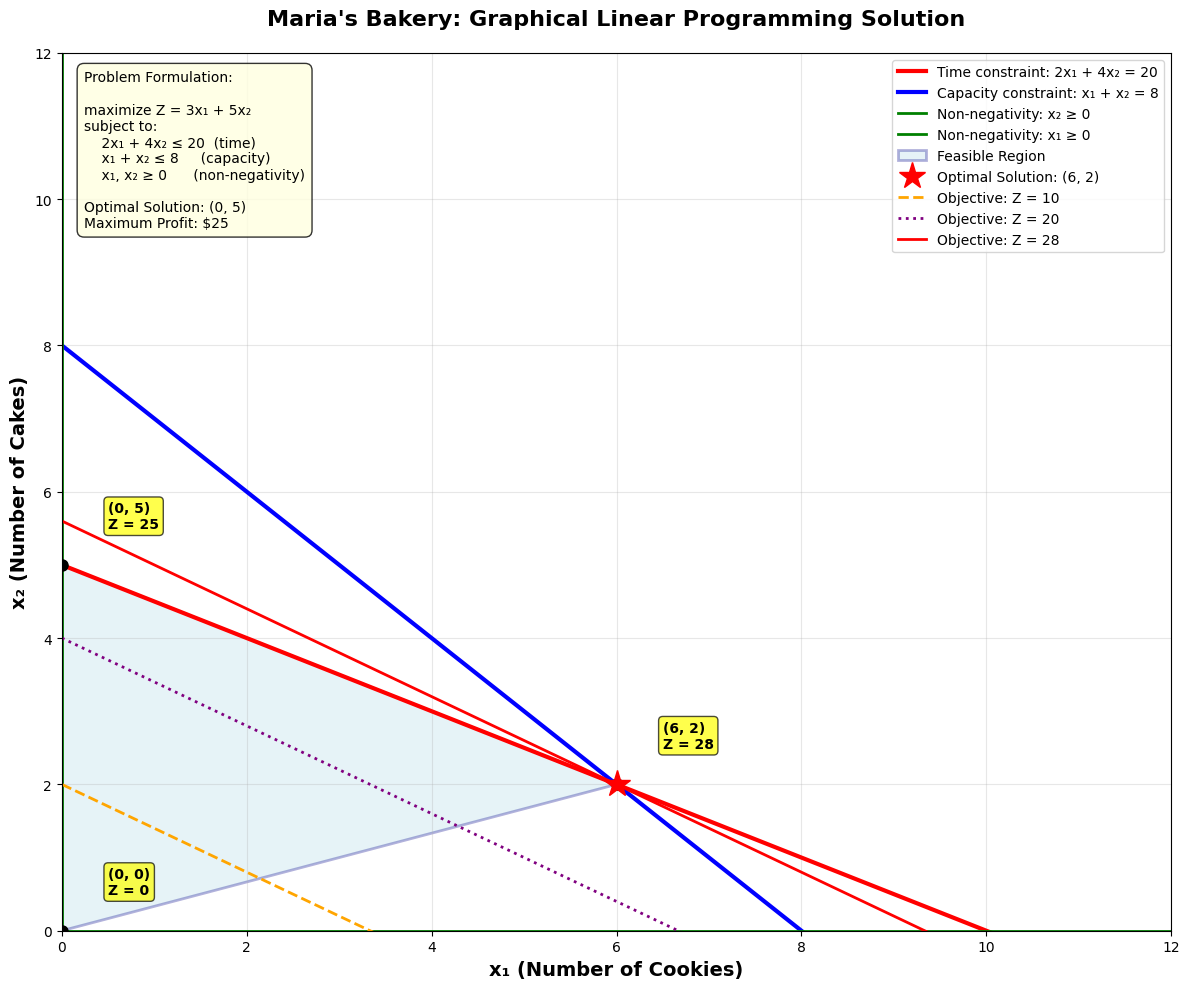


Creating Sensitivity Analysis plots...


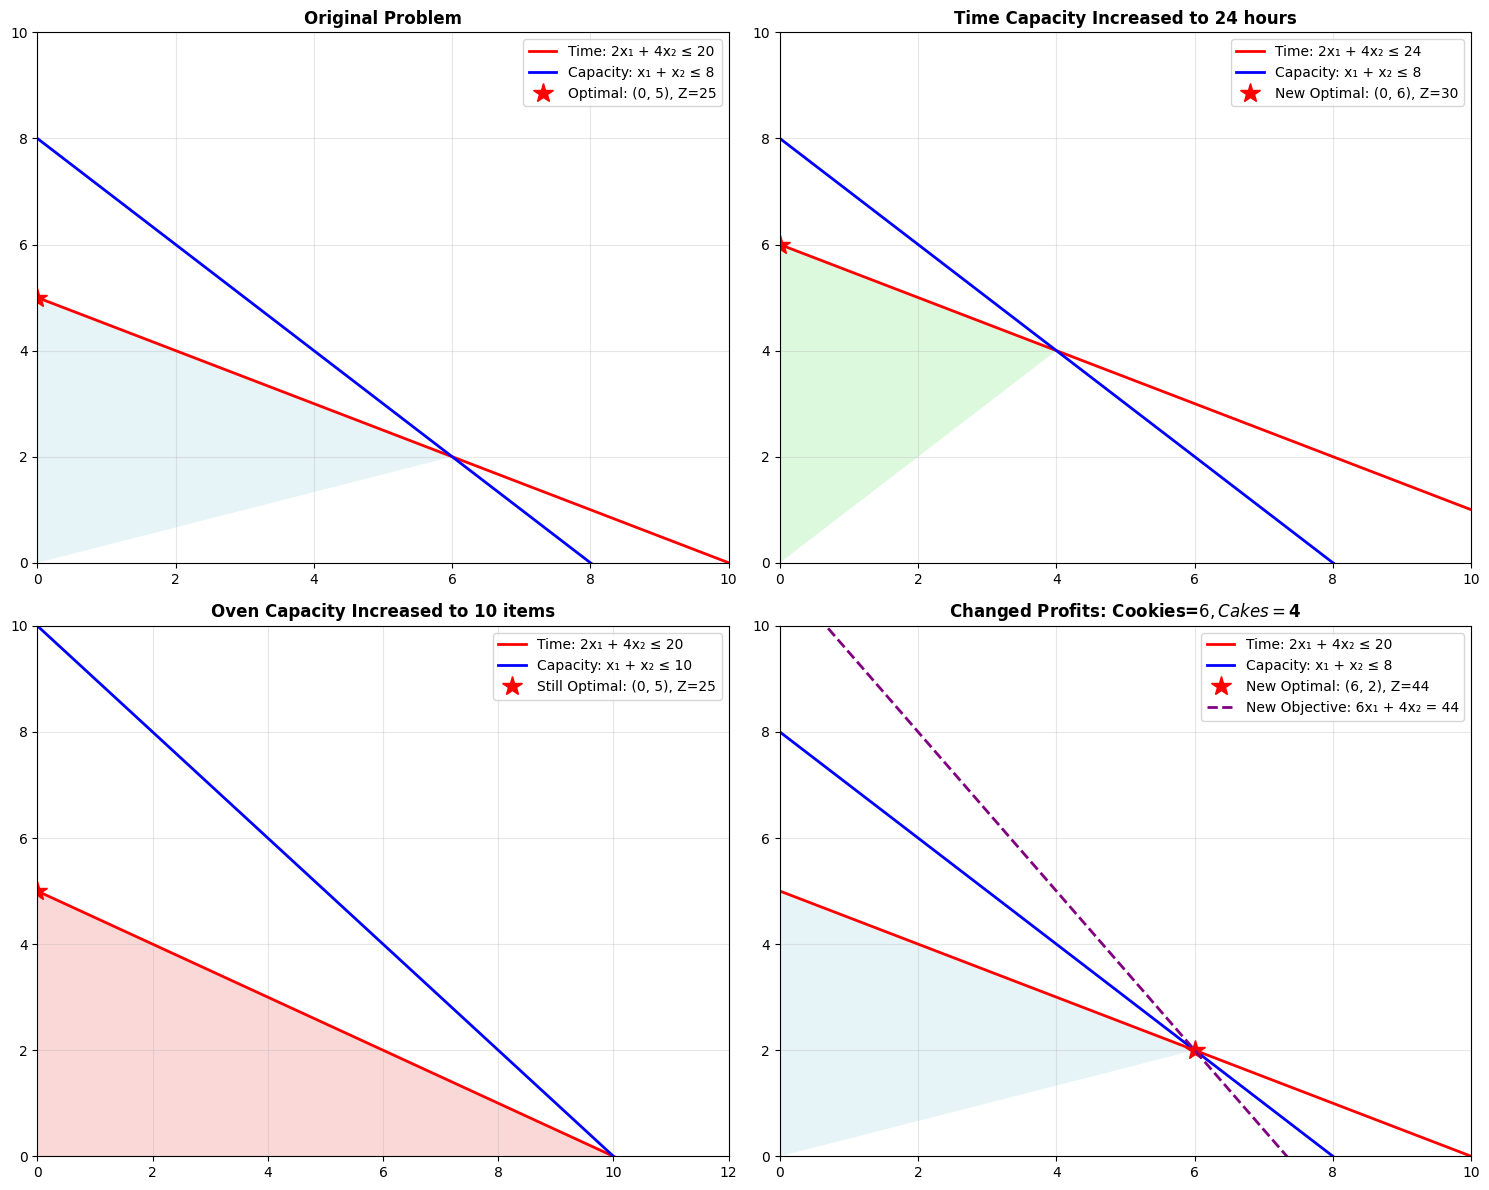


Creating Corner Point Method illustration...


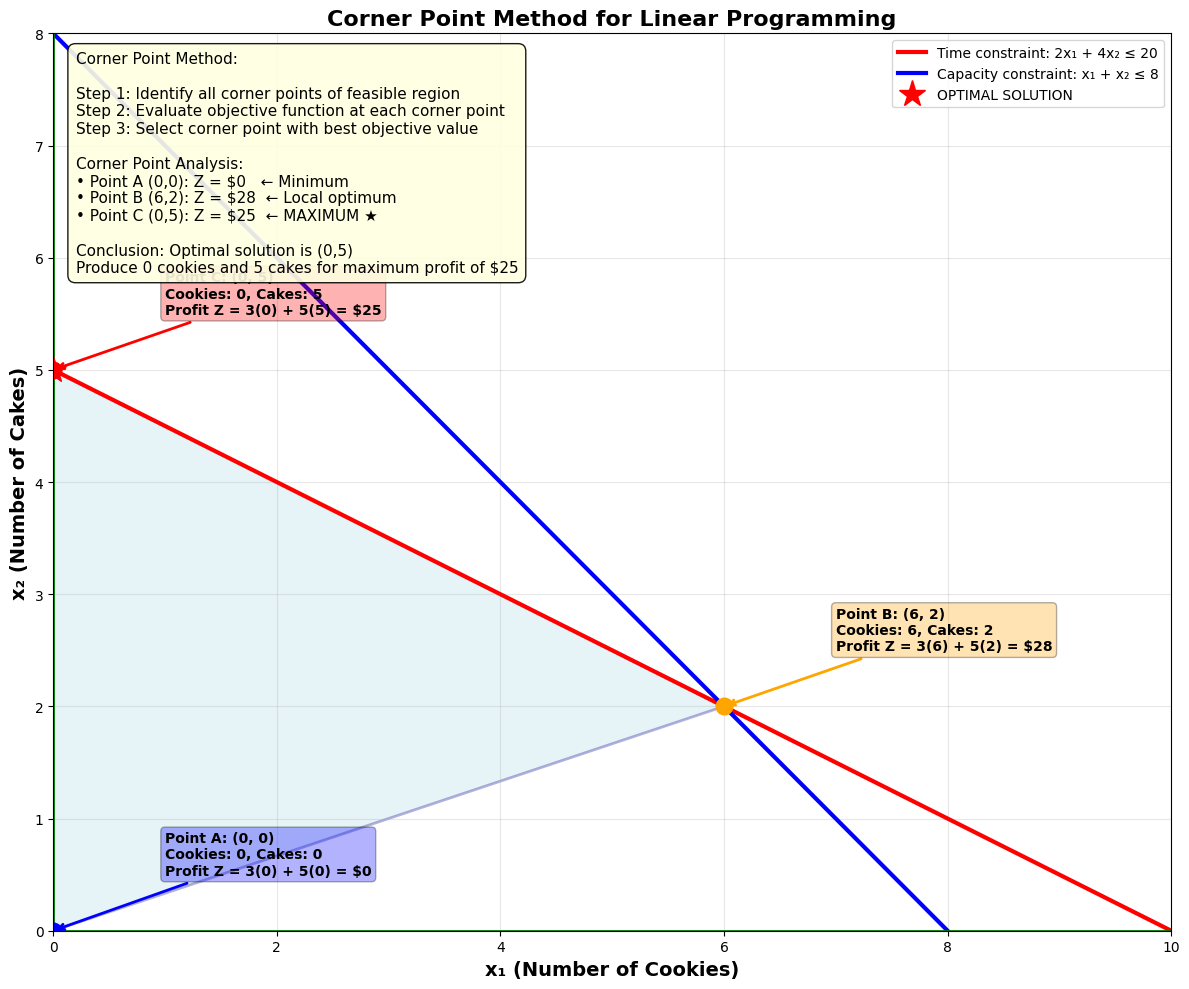


Graphical LP Solution Complete!
Key Insights:
1. Feasible region is bounded by constraint lines
2. Optimal solution occurs at corner point of feasible region
3. Objective function lines show direction of optimization
4. Sensitivity analysis reveals how changes affect optimal solution
5. Corner point method systematically finds optimal solution


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon
import matplotlib.patches as mpatches

def plot_marias_bakery_lp():
    """
    Graphical solution for Maria's Bakery Linear Programming Problem
    
    Problem:
    maximize Z = 3x1 + 5x2 (profit)
    subject to:
        2x1 + 4x2 ≤ 20  (time constraint)
        x1 + x2 ≤ 8     (capacity constraint)  
        x1, x2 ≥ 0      (non-negativity)
    
    Where:
    x1 = number of cookies
    x2 = number of cakes
    """
    
    # Create figure and axis
    fig, ax = plt.subplots(1, 1, figsize=(12, 10))
    
    # Define the range for plotting
    x1_max = 12
    x2_max = 12
    x1 = np.linspace(0, x1_max, 400)
    
    # Constraint lines
    # Time constraint: 2x1 + 4x2 = 20 → x2 = 5 - 0.5x1
    x2_time = 5 - 0.5 * x1
    
    # Capacity constraint: x1 + x2 = 8 → x2 = 8 - x1  
    x2_capacity = 8 - x1
    
    # Plot constraint lines
    ax.plot(x1, x2_time, 'r-', linewidth=3, label='Time constraint: 2x₁ + 4x₂ = 20')
    ax.plot(x1, x2_capacity, 'b-', linewidth=3, label='Capacity constraint: x₁ + x₂ = 8')
    
    # Plot non-negativity constraints
    ax.axhline(y=0, color='green', linewidth=2, label='Non-negativity: x₂ ≥ 0')
    ax.axvline(x=0, color='green', linewidth=2, label='Non-negativity: x₁ ≥ 0')
    
    # Find feasible region vertices
    # Intersection points (corner points)
    vertices = []
    
    # Origin
    vertices.append((0, 0))
    
    # Time constraint meets x1-axis: 2x1 + 4(0) = 20 → x1 = 10
    vertices.append((10, 0))
    
    # Time constraint meets x2-axis: 2(0) + 4x2 = 20 → x2 = 5
    vertices.append((0, 5))
    
    # Capacity constraint meets x1-axis: x1 + 0 = 8 → x1 = 8
    vertices.append((8, 0))
    
    # Capacity constraint meets x2-axis: 0 + x2 = 8 → x2 = 8
    vertices.append((0, 8))
    
    # Intersection of time and capacity constraints
    # 2x1 + 4x2 = 20 and x1 + x2 = 8
    # From second: x1 = 8 - x2
    # Substitute: 2(8 - x2) + 4x2 = 20 → 16 - 2x2 + 4x2 = 20 → 2x2 = 4 → x2 = 2
    # Then x1 = 8 - 2 = 6
    intersection_point = (6, 2)
    vertices.append(intersection_point)
    
    # Determine actual feasible region vertices
    feasible_vertices = []
    
    # Check each vertex against all constraints
    for vertex in vertices:
        x1_val, x2_val = vertex
        
        # Check all constraints
        time_satisfied = 2 * x1_val + 4 * x2_val <= 20 + 1e-6  # Small tolerance for numerical errors
        capacity_satisfied = x1_val + x2_val <= 8 + 1e-6
        non_neg_satisfied = x1_val >= -1e-6 and x2_val >= -1e-6
        
        if time_satisfied and capacity_satisfied and non_neg_satisfied:
            feasible_vertices.append(vertex)
    
    # Sort vertices to create proper polygon (counterclockwise)
    # For this problem, the feasible vertices should be: (0,0), (6,2), (0,5)
    feasible_vertices = [(0, 0), (6, 2), (0, 5)]
    
    # Create and plot feasible region
    feasible_region = Polygon(feasible_vertices, alpha=0.3, facecolor='lightblue', 
                             edgecolor='darkblue', linewidth=2, label='Feasible Region')
    ax.add_patch(feasible_region)
    
    # Plot corner points
    for i, vertex in enumerate(feasible_vertices):
        ax.plot(vertex[0], vertex[1], 'ko', markersize=8)
        
        # Calculate objective function value at each corner point
        z_value = 3 * vertex[0] + 5 * vertex[1]
        
        ax.annotate(f'({vertex[0]}, {vertex[1]})\nZ = {z_value}', 
                   xy=vertex, xytext=(vertex[0] + 0.5, vertex[1] + 0.5),
                   fontsize=10, fontweight='bold',
                   bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
    
    # Find and highlight optimal solution
    optimal_vertex = max(feasible_vertices, key=lambda v: 3 * v[0] + 5 * v[1])
    optimal_value = 3 * optimal_vertex[0] + 5 * optimal_vertex[1]
    
    ax.plot(optimal_vertex[0], optimal_vertex[1], 'r*', markersize=20, 
           label=f'Optimal Solution: ({optimal_vertex[0]}, {optimal_vertex[1]})')
    
    # Plot objective function lines (isoprofit lines)
    # Z = 3x1 + 5x2 → x2 = (Z - 3x1)/5
    z_values = [10, 20, optimal_value]
    colors = ['orange', 'purple', 'red']
    linestyles = ['--', ':', '-']
    
    for z, color, linestyle in zip(z_values, colors, linestyles):
        x2_objective = (z - 3 * x1) / 5
        ax.plot(x1, x2_objective, color=color, linewidth=2, linestyle=linestyle,
               label=f'Objective: Z = {z}')
    
    # Set axis properties
    ax.set_xlim(0, x1_max)
    ax.set_ylim(0, x2_max)
    ax.set_xlabel('x₁ (Number of Cookies)', fontsize=14, fontweight='bold')
    ax.set_ylabel('x₂ (Number of Cakes)', fontsize=14, fontweight='bold')
    ax.set_title("Maria's Bakery: Graphical Linear Programming Solution", 
                fontsize=16, fontweight='bold', pad=20)
    
    # Add grid
    ax.grid(True, alpha=0.3)
    
    # Add legend
    ax.legend(loc='upper right', fontsize=10)
    
    # Add text box with problem formulation
    problem_text = """Problem Formulation:
    
maximize Z = 3x₁ + 5x₂
subject to:
    2x₁ + 4x₂ ≤ 20  (time)
    x₁ + x₂ ≤ 8     (capacity)
    x₁, x₂ ≥ 0      (non-negativity)
    
Optimal Solution: (0, 5)
Maximum Profit: $25"""
    
    ax.text(0.02, 0.98, problem_text, transform=ax.transAxes, fontsize=10,
           verticalalignment='top', bbox=dict(boxstyle="round,pad=0.5", 
           facecolor="lightyellow", alpha=0.8))
    
    plt.tight_layout()
    return fig, ax

def plot_sensitivity_analysis():
    """
    Show how the optimal solution changes with parameter variations
    """
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # Base case data
    x1 = np.linspace(0, 12, 400)
    base_feasible = [(0, 0), (6, 2), (0, 5)]
    
    # 1. Original problem
    ax1.set_title("Original Problem", fontweight='bold')
    x2_time = 5 - 0.5 * x1
    x2_capacity = 8 - x1
    
    ax1.plot(x1, x2_time, 'r-', linewidth=2, label='Time: 2x₁ + 4x₂ ≤ 20')
    ax1.plot(x1, x2_capacity, 'b-', linewidth=2, label='Capacity: x₁ + x₂ ≤ 8')
    
    feasible_region1 = Polygon(base_feasible, alpha=0.3, facecolor='lightblue')
    ax1.add_patch(feasible_region1)
    ax1.plot(0, 5, 'r*', markersize=15, label='Optimal: (0, 5), Z=25')
    
    ax1.set_xlim(0, 10)
    ax1.set_ylim(0, 10)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. Increased time capacity (20 → 24)
    ax2.set_title("Time Capacity Increased to 24 hours", fontweight='bold')
    x2_time_new = 6 - 0.5 * x1  # 2x1 + 4x2 = 24 → x2 = 6 - 0.5x1
    
    ax2.plot(x1, x2_time_new, 'r-', linewidth=2, label='Time: 2x₁ + 4x₂ ≤ 24')
    ax2.plot(x1, x2_capacity, 'b-', linewidth=2, label='Capacity: x₁ + x₂ ≤ 8')
    
    # New feasible region vertices: (0,0), (8,0), (0,6) but limited by capacity
    # Intersection: 2x1 + 4x2 = 24 and x1 + x2 = 8 → x1 = 8, x2 = 0 (at boundary)
    # Actually: x1 = 8-x2, so 2(8-x2) + 4x2 = 24 → 16-2x2+4x2 = 24 → 2x2 = 8 → x2 = 4, x1 = 4
    new_feasible = [(0, 0), (4, 4), (0, 6)]
    
    feasible_region2 = Polygon(new_feasible, alpha=0.3, facecolor='lightgreen')
    ax2.add_patch(feasible_region2)
    ax2.plot(0, 6, 'r*', markersize=15, label='New Optimal: (0, 6), Z=30')
    
    ax2.set_xlim(0, 10)
    ax2.set_ylim(0, 10)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 3. Increased capacity (8 → 10)
    ax3.set_title("Oven Capacity Increased to 10 items", fontweight='bold')
    x2_capacity_new = 10 - x1  # x1 + x2 = 10
    
    ax3.plot(x1, x2_time, 'r-', linewidth=2, label='Time: 2x₁ + 4x₂ ≤ 20')
    ax3.plot(x1, x2_capacity_new, 'b-', linewidth=2, label='Capacity: x₁ + x₂ ≤ 10')
    
    # New intersection: 2x1 + 4x2 = 20 and x1 + x2 = 10
    # x1 = 10 - x2, so 2(10-x2) + 4x2 = 20 → 20-2x2+4x2 = 20 → 2x2 = 0 → x2 = 0, x1 = 10
    # But this violates time constraint, so optimal is still on time constraint
    new_feasible3 = [(0, 0), (10, 0), (0, 5)]
    
    feasible_region3 = Polygon(new_feasible3, alpha=0.3, facecolor='lightcoral')
    ax3.add_patch(feasible_region3)
    ax3.plot(0, 5, 'r*', markersize=15, label='Still Optimal: (0, 5), Z=25')
    
    ax3.set_xlim(0, 12)
    ax3.set_ylim(0, 10)
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # 4. Changed objective coefficients
    ax4.set_title("Changed Profits: Cookies=$6, Cakes=$4", fontweight='bold')
    
    ax4.plot(x1, x2_time, 'r-', linewidth=2, label='Time: 2x₁ + 4x₂ ≤ 20')
    ax4.plot(x1, x2_capacity, 'b-', linewidth=2, label='Capacity: x₁ + x₂ ≤ 8')
    
    feasible_region4 = Polygon(base_feasible, alpha=0.3, facecolor='lightblue')
    ax4.add_patch(feasible_region4)
    
    # New objective: maximize 6x1 + 4x2
    # Check corner points: (0,0)→0, (6,2)→44, (0,5)→20
    # New optimal is (6,2)
    ax4.plot(6, 2, 'r*', markersize=15, label='New Optimal: (6, 2), Z=44')
    
    # Plot new objective function line
    x2_obj_new = (44 - 6 * x1) / 4
    ax4.plot(x1, x2_obj_new, 'purple', linewidth=2, linestyle='--', label='New Objective: 6x₁ + 4x₂ = 44')
    
    ax4.set_xlim(0, 10)
    ax4.set_ylim(0, 10)
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

def plot_corner_point_method():
    """
    Illustrate the corner point method step by step
    """
    fig, ax = plt.subplots(1, 1, figsize=(12, 10))
    
    x1 = np.linspace(0, 12, 400)
    
    # Plot constraints
    x2_time = 5 - 0.5 * x1
    x2_capacity = 8 - x1
    
    ax.plot(x1, x2_time, 'r-', linewidth=3, label='Time constraint: 2x₁ + 4x₂ ≤ 20')
    ax.plot(x1, x2_capacity, 'b-', linewidth=3, label='Capacity constraint: x₁ + x₂ ≤ 8')
    ax.axhline(y=0, color='green', linewidth=2)
    ax.axvline(x=0, color='green', linewidth=2)
    
    # Feasible region
    feasible_vertices = [(0, 0), (6, 2), (0, 5)]
    feasible_region = Polygon(feasible_vertices, alpha=0.3, facecolor='lightblue', 
                             edgecolor='darkblue', linewidth=2)
    ax.add_patch(feasible_region)
    
    # Corner points with detailed analysis
    corner_points = [(0, 0), (6, 2), (0, 5)]
    labels = ['A', 'B', 'C']
    colors = ['blue', 'orange', 'red']
    
    for i, (point, label, color) in enumerate(zip(corner_points, labels, colors)):
        x1_val, x2_val = point
        z_value = 3 * x1_val + 5 * x2_val
        
        # Plot point
        ax.plot(x1_val, x2_val, 'o', color=color, markersize=12)
        
        # Detailed annotation
        ax.annotate(f'Point {label}: ({x1_val}, {x2_val})\n' +
                   f'Cookies: {x1_val}, Cakes: {x2_val}\n' + 
                   f'Profit Z = 3({x1_val}) + 5({x2_val}) = ${z_value}',
                   xy=point, xytext=(x1_val + 1, x2_val + 0.5),
                   fontsize=10, fontweight='bold',
                   bbox=dict(boxstyle="round,pad=0.3", facecolor=color, alpha=0.3),
                   arrowprops=dict(arrowstyle='->', color=color, lw=2))
    
    # Highlight optimal solution
    ax.plot(0, 5, '*', color='red', markersize=20, label='OPTIMAL SOLUTION')
    
    # Add step-by-step method explanation
    method_text = """Corner Point Method:

Step 1: Identify all corner points of feasible region
Step 2: Evaluate objective function at each corner point
Step 3: Select corner point with best objective value

Corner Point Analysis:
• Point A (0,0): Z = $0   ← Minimum
• Point B (6,2): Z = $28  ← Local optimum  
• Point C (0,5): Z = $25  ← MAXIMUM ★

Conclusion: Optimal solution is (0,5)
Produce 0 cookies and 5 cakes for maximum profit of $25"""
    
    ax.text(0.02, 0.98, method_text, transform=ax.transAxes, fontsize=11,
           verticalalignment='top', bbox=dict(boxstyle="round,pad=0.5", 
           facecolor="lightyellow", alpha=0.9))
    
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 8)
    ax.set_xlabel('x₁ (Number of Cookies)', fontsize=14, fontweight='bold')
    ax.set_ylabel('x₂ (Number of Cakes)', fontsize=14, fontweight='bold')
    ax.set_title('Corner Point Method for Linear Programming', fontsize=16, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper right')
    
    plt.tight_layout()
    return fig

# Main execution
if __name__ == "__main__":
    # Create the main graphical solution plot
    print("Creating Maria's Bakery Graphical LP Solution...")
    fig1, ax1 = plot_marias_bakery_lp()
    plt.show()
    
    print("\nCreating Sensitivity Analysis plots...")
    fig2 = plot_sensitivity_analysis()
    plt.show()
    
    print("\nCreating Corner Point Method illustration...")
    fig3 = plot_corner_point_method()
    plt.show()
    
    print("\nGraphical LP Solution Complete!")
    print("Key Insights:")
    print("1. Feasible region is bounded by constraint lines")
    print("2. Optimal solution occurs at corner point of feasible region")
    print("3. Objective function lines show direction of optimization")
    print("4. Sensitivity analysis reveals how changes affect optimal solution")
    print("5. Corner point method systematically finds optimal solution")

# Knapsack Problem with GurobiPy

## Mathematical Formulation

The knapsack problem is one of the most fundamental problems in combinatorial optimization. Given a set of items, each with a weight and value, we must determine which items to include in a knapsack so that the total weight is less than or equal to a given capacity and the total value is maximized.

### Problem Definition

Let $I = \{1, 2, \ldots, n\}$ be the set of $n$ items. For each item $i \in I$:
- $w_i$ = weight of item $i$
- $v_i$ = value (profit) of item $i$
- $W$ = maximum capacity of the knapsack

### Decision Variables
Let $x_i \in \{0, 1\}$ be a binary decision variable for each item $i \in I$:

$$x_i = \begin{cases}
1 & \text{if item } i \text{ is selected for the knapsack} \\
0 & \text{if item } i \text{ is not selected}
\end{cases}$$

### Objective Function
Maximize the total value of selected items:
$$\max \sum_{i \in I} v_i x_i$$

**Interpretation:** We sum the values $v_i$ of all items $i$ that are selected ($x_i = 1$). Items not selected ($x_i = 0$) contribute zero to the objective.

### Constraints

#### 1. Capacity Constraint (Knapsack Constraint)

The fundamental constraint of the knapsack problem ensures that the total weight of selected items does not exceed the knapsack capacity:

$$\sum_{i \in I} w_i x_i \leq W$$

**Detailed Explanation:**

- **Left Hand Side:** $\sum_{i \in I} w_i x_i$ represents the **total weight** of selected items
  - If $x_i = 1$ (item selected): contributes weight $w_i$ to the sum
  - If $x_i = 0$ (item not selected): contributes $0$ to the sum
  - The sum aggregates weights only from selected items

- **Right Hand Side:** $W$ is the **maximum allowable weight** (knapsack capacity)

- **Inequality:** The constraint is an inequality ($\leq$) rather than equality because:
  - We don't need to fill the knapsack completely
  - Partial filling is allowed if it leads to better value
  - The knapsack can have **residual capacity** $W - \sum_{i \in I} w_i x_i \geq 0$

**Physical Interpretation:**
- Think of a backpack with weight limit $W$ pounds
- Each item has physical weight $w_i$ and value $v_i$
- We can carry at most $W$ pounds total
- Goal: maximize value while staying within weight limit

#### 2. Alternative Constraint Formulations

**Explicit Form for Each Item:**
$$w_1 x_1 + w_2 x_2 + \cdots + w_n x_n \leq W$$

**Residual Capacity Form:**
We can introduce a **slack variable** $s \geq 0$ representing unused capacity:
$$\sum_{i \in I} w_i x_i + s = W$$
$$s \geq 0$$

where $s$ represents the **leftover capacity** after packing selected items.

**Fractional Relaxation (for understanding bounds):**
If we relax the binary constraint to $0 \leq x_i \leq 1$, we get the **linear programming relaxation**:
$$\sum_{i \in I} w_i x_i \leq W$$
$$0 \leq x_i \leq 1 \quad \forall i \in I$$

This allows "fractional items" and provides an **upper bound** on the optimal integer solution.

#### 3. Binary Constraints

$$x_i \in \{0, 1\} \quad \forall i \in I$$

**Meaning and Implications:**

- **Binary Nature:** Each item is either completely included or completely excluded
  - No partial items allowed (can't take half of an item)
  - This makes the problem **combinatorially complex**

- **Solution Space:** With $n$ items, there are $2^n$ possible combinations
  - Each combination is a binary vector $(x_1, x_2, \ldots, x_n)$
  - Only combinations satisfying the capacity constraint are **feasible**

- **Why Not Continuous?** 
  - Many real-world items cannot be divided (e.g., laptops, books, tools)
  - Binary constraint captures the **discrete nature** of the decision

#### 4. Constraint Analysis and Properties

**Feasibility Analysis:**
A solution $\mathbf{x} = (x_1, x_2, \ldots, x_n)$ is **feasible** if and only if:
1. $x_i \in \{0, 1\}$ for all $i \in I$ (binary feasibility)
2. $\sum_{i \in I} w_i x_i \leq W$ (capacity feasibility)

**Tightness of Capacity Constraint:**
- **Tight constraint:** $\sum_{i \in I} w_i x_i = W$ (knapsack completely full)
- **Slack constraint:** $\sum_{i \in I} w_i x_i < W$ (unused capacity remains)
- In optimal solutions, the capacity constraint is often tight or nearly tight

**Constraint Coefficient Interpretation:**
- **Weight coefficients** $w_i$: measure the "cost" of including item $i$
- **Objective coefficients** $v_i$: measure the "benefit" of including item $i$
- **Value-to-weight ratio** $\frac{v_i}{w_i}$: efficiency of item $i$

#### 5. Special Cases and Variants

**Unbounded Knapsack:** Allow multiple copies of each item
$$\sum_{i \in I} w_i x_i \leq W$$
$$x_i \geq 0 \text{ and integer} \quad \forall i \in I$$

**Multiple Knapsacks:** $m$ knapsacks with capacities $W_1, W_2, \ldots, W_m$
$$\sum_{i \in I} w_i x_{ij} \leq W_j \quad \forall j \in \{1, 2, \ldots, m\}$$
$$\sum_{j=1}^{m} x_{ij} \leq 1 \quad \forall i \in I$$

**Multidimensional Knapsack:** Multiple resource constraints
$$\sum_{i \in I} w_{ir} x_i \leq W_r \quad \forall r \in \{1, 2, \ldots, R\}$$

#### 6. Constraint Validation Example

Consider 3 items with weights $w = [2, 3, 4]$, values $v = [3, 4, 5]$, and capacity $W = 5$.

**Solution 1:** $x = [1, 1, 0]$ (take items 1 and 2)
- **Capacity check:** $2 \cdot 1 + 3 \cdot 1 + 4 \cdot 0 = 5 \leq 5$ ✓
- **Objective value:** $3 \cdot 1 + 4 \cdot 1 + 5 \cdot 0 = 7$

**Solution 2:** $x = [0, 0, 1]$ (take only item 3)
- **Capacity check:** $2 \cdot 0 + 3 \cdot 0 + 4 \cdot 1 = 4 \leq 5$ ✓
- **Objective value:** $3 \cdot 0 + 4 \cdot 0 + 5 \cdot 1 = 5$

**Invalid Solution:** $x = [1, 1, 1]$ (take all items)
- **Capacity check:** $2 \cdot 1 + 3 \cdot 1 + 4 \cdot 1 = 9 \not\leq 5$ ✗ (infeasible)

This example shows how the capacity constraint filters out infeasible solutions.

## Python Implementation

KNAPSACK PROBLEM SOLVER WITH GUROBI

1. GENERATING RANDOM INSTANCE
----------------------------------------
Generated knapsack instance:
  - Number of items: 25
  - Knapsack capacity: 200
  - Total items weight: 587
  - Total items value: 1353
  - Average value/weight ratio: 2.46

Sample items:
  Item 0: weight=12, value=10, ratio=0.83
  Item 1: weight=22, value=39, ratio=1.77
  Item 2: weight=13, value=43, ratio=3.31
  Item 3: weight=39, value=75, ratio=1.92
  Item 4: weight=32, value=54, ratio=1.69

2. SOLVING WITH GUROBI
----------------------------------------
Set parameter Username
Academic license - for non-commercial use only - expires 2026-08-14
Set parameter TimeLimit to value 30
Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (mac64[arm] - Darwin 24.6.0 24G84)

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Non-default parameters:
TimeLimit  30

Optimize a model with 1 rows, 25 columns and 25 nonzeros
Model fingerprint

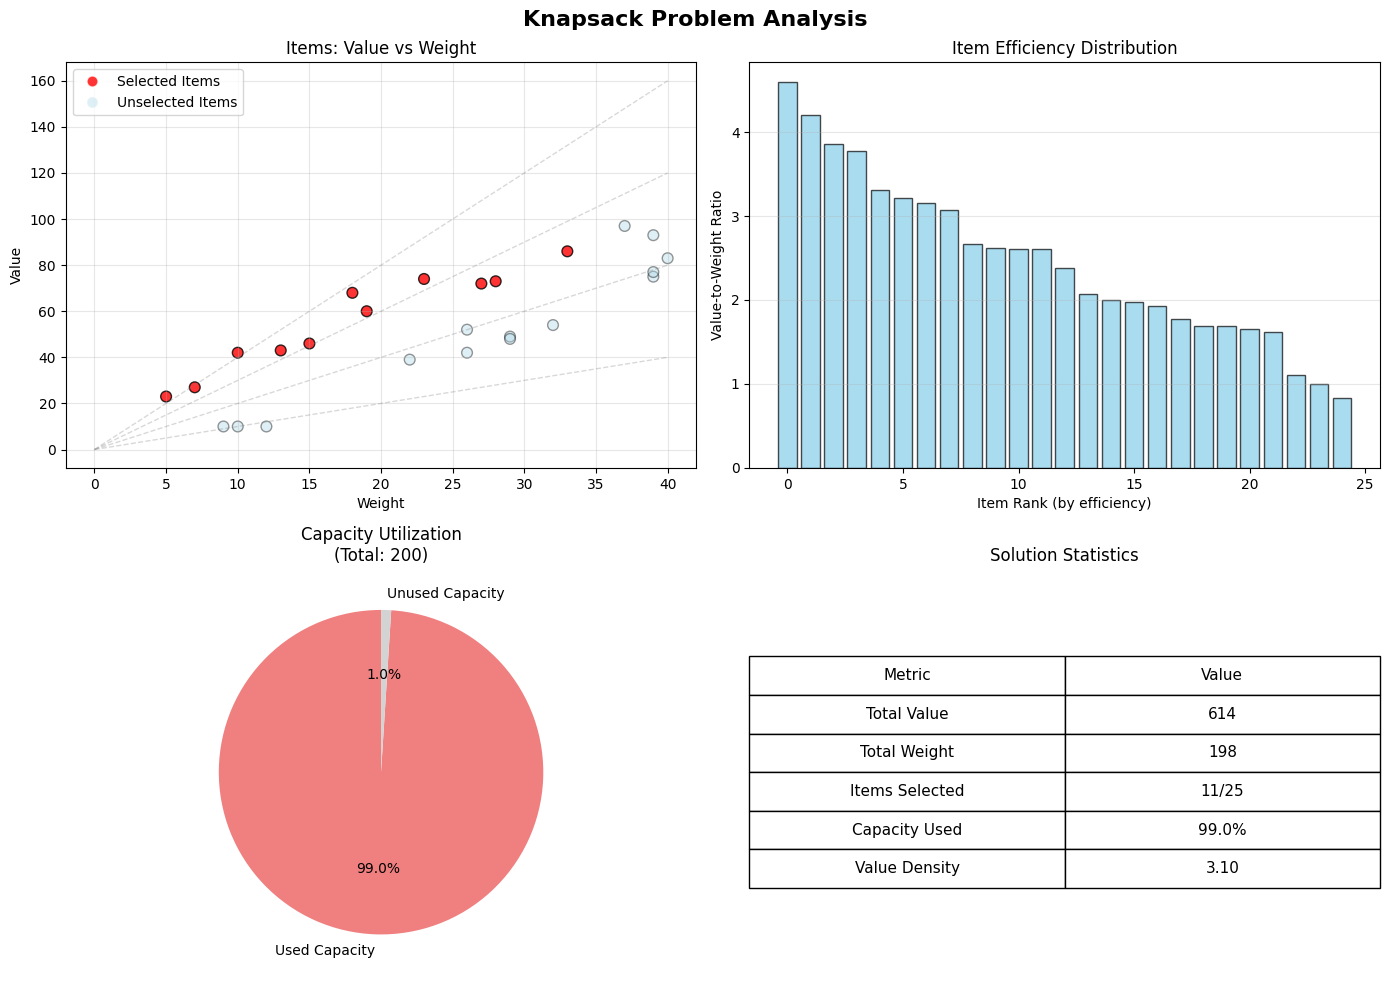


Demo completed successfully!


In [3]:
import gurobipy as gp
from gurobipy import GRB
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple, Dict
import random
import seaborn as sns

class KnapsackSolver:
    """
    A class to generate, solve, and visualize knapsack problems using Gurobi.
    """
    
    def __init__(self, seed: int = 42):
        """Initialize the solver with a random seed for reproducibility."""
        random.seed(seed)
        np.random.seed(seed)
        self.instance = None
        self.solution = None
        
    def generate_instance(self, n_items: int = 20, capacity: int = 100, 
                         weight_range: Tuple[int, int] = (1, 30),
                         value_range: Tuple[int, int] = (1, 50),
                         correlation: float = 0.0) -> Dict:
        """
        Generate a random knapsack instance.
        
        Parameters:
        - n_items: Number of items to generate
        - capacity: Knapsack capacity
        - weight_range: (min_weight, max_weight) for items
        - value_range: (min_value, max_value) for items
        - correlation: Correlation between weight and value (-1 to 1)
                      0 = no correlation, 1 = high value items are heavy
        
        Returns:
        - Dictionary containing instance data
        """
        items = []
        
        for i in range(n_items):
            if correlation == 0.0:
                # Independent weight and value
                weight = random.randint(*weight_range)
                value = random.randint(*value_range)
            else:
                # Correlated weight and value
                weight = random.randint(*weight_range)
                # Normalize weight to [0, 1] range
                weight_norm = (weight - weight_range[0]) / (weight_range[1] - weight_range[0])
                
                if correlation > 0:
                    # Positive correlation: heavier items tend to be more valuable
                    value_base = value_range[0] + weight_norm * (value_range[1] - value_range[0])
                else:
                    # Negative correlation: lighter items tend to be more valuable
                    value_base = value_range[1] - weight_norm * (value_range[1] - value_range[0])
                
                # Add some randomness
                noise = random.uniform(-0.3, 0.3) * (value_range[1] - value_range[0])
                value = max(value_range[0], min(value_range[1], 
                           int(value_base + noise)))
            
            items.append({
                'id': i,
                'weight': weight,
                'value': value,
                'ratio': value / weight  # value-to-weight ratio
            })
        
        self.instance = {
            'items': items,
            'capacity': capacity,
            'n_items': n_items
        }
        
        return self.instance
    
    def solve(self, verbose: bool = True, time_limit: int = 60) -> Dict:
        """
        Solve the knapsack problem using Gurobi.
        
        Parameters:
        - verbose: Whether to print solver output
        - time_limit: Maximum time in seconds for solving
        
        Returns:
        - Dictionary containing solution information
        """
        if self.instance is None:
            raise ValueError("No instance generated. Call generate_instance() first.")
        
        # Create Gurobi model
        model = gp.Model("knapsack")
        
        if not verbose:
            model.setParam('OutputFlag', 0)
        
        model.setParam('TimeLimit', time_limit)
        
        # Decision variables
        x = {}
        for item in self.instance['items']:
            i = item['id']
            x[i] = model.addVar(vtype=GRB.BINARY, name=f"x_{i}")
        
        # Objective function: maximize total value
        obj = gp.quicksum(item['value'] * x[item['id']] for item in self.instance['items'])
        model.setObjective(obj, GRB.MAXIMIZE)
        
        # Capacity constraint
        capacity_constraint = gp.quicksum(
            item['weight'] * x[item['id']] for item in self.instance['items']
        )
        model.addConstr(capacity_constraint <= self.instance['capacity'], "capacity")
        
        # Solve the model
        model.optimize()
        
        # Extract solution
        if model.Status == GRB.OPTIMAL:
            selected_items = []
            total_weight = 0
            total_value = 0
            
            for item in self.instance['items']:
                i = item['id']
                if x[i].X > 0.5:  # Item is selected
                    selected_items.append(item)
                    total_weight += item['weight']
                    total_value += item['value']
            
            # Calculate statistics
            efficiency = total_value / total_weight if total_weight > 0 else 0
            utilization = total_weight / self.instance['capacity']
            
            self.solution = {
                'status': 'optimal',
                'objective_value': model.ObjVal,
                'selected_items': selected_items,
                'total_weight': total_weight,
                'total_value': total_value,
                'n_selected': len(selected_items),
                'capacity_utilization': utilization,
                'value_density': efficiency,
                'solve_time': model.Runtime,
                'gap': model.MIPGap if hasattr(model, 'MIPGap') else 0
            }
            
            if verbose:
                print(f"Optimal solution found!")
                print(f"Total value: {self.solution['objective_value']:.0f}")
                print(f"Total weight: {total_weight} / {self.instance['capacity']}")
                print(f"Capacity utilization: {utilization:.2%}")
                print(f"Items selected: {len(selected_items)} / {self.instance['n_items']}")
                print(f"Value density: {efficiency:.2f} value per unit weight")
                print(f"Solve time: {model.Runtime:.2f} seconds")
                
        elif model.Status == GRB.TIME_LIMIT:
            # Get best solution found within time limit
            if model.SolCount > 0:
                selected_items = []
                total_weight = 0
                total_value = 0
                
                for item in self.instance['items']:
                    i = item['id']
                    if x[i].X > 0.5:
                        selected_items.append(item)
                        total_weight += item['weight']
                        total_value += item['value']
                
                utilization = total_weight / self.instance['capacity']
                efficiency = total_value / total_weight if total_weight > 0 else 0
                
                self.solution = {
                    'status': 'time_limit',
                    'objective_value': model.ObjVal,
                    'selected_items': selected_items,
                    'total_weight': total_weight,
                    'total_value': total_value,
                    'n_selected': len(selected_items),
                    'capacity_utilization': utilization,
                    'value_density': efficiency,
                    'solve_time': model.Runtime,
                    'gap': model.MIPGap
                }
                
                if verbose:
                    print(f"Time limit reached. Best solution found:")
                    print(f"Total value: {self.solution['objective_value']:.0f}")
                    print(f"Optimality gap: {model.MIPGap:.2%}")
            else:
                self.solution = {'status': 'no_solution'}
                if verbose:
                    print("Time limit reached with no feasible solution found!")
        else:
            self.solution = {'status': 'infeasible'}
            if verbose:
                print("No feasible solution found!")
        
        return self.solution
    
    def solve_greedy_comparison(self) -> Dict:
        """
        Solve using greedy heuristic for comparison with optimal solution.
        Greedy algorithm: sort by value-to-weight ratio, take items in order.
        """
        if self.instance is None:
            raise ValueError("No instance generated.")
        
        # Sort items by value-to-weight ratio (descending)
        sorted_items = sorted(self.instance['items'], 
                            key=lambda x: x['ratio'], reverse=True)
        
        selected_items = []
        total_weight = 0
        total_value = 0
        
        for item in sorted_items:
            if total_weight + item['weight'] <= self.instance['capacity']:
                selected_items.append(item)
                total_weight += item['weight']
                total_value += item['value']
        
        utilization = total_weight / self.instance['capacity']
        efficiency = total_value / total_weight if total_weight > 0 else 0
        
        return {
            'method': 'greedy',
            'selected_items': selected_items,
            'total_weight': total_weight,
            'total_value': total_value,
            'n_selected': len(selected_items),
            'capacity_utilization': utilization,
            'value_density': efficiency
        }
    
    def plot_solution(self, figsize: Tuple[int, int] = (15, 10)) -> None:
        """
        Create comprehensive visualization of the knapsack solution.
        
        Parameters:
        - figsize: Figure size for the plot
        """
        if self.instance is None:
            raise ValueError("No instance generated.")
        
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=figsize)
        fig.suptitle('Knapsack Problem Analysis', fontsize=16, fontweight='bold')
        
        # Prepare data
        items = self.instance['items']
        weights = [item['weight'] for item in items]
        values = [item['value'] for item in items]
        ratios = [item['ratio'] for item in items]
        
        # Colors for selected/unselected items
        if self.solution and self.solution.get('selected_items'):
            selected_ids = {item['id'] for item in self.solution['selected_items']}
            colors = ['red' if item['id'] in selected_ids else 'lightblue' 
                     for item in items]
            alphas = [0.8 if item['id'] in selected_ids else 0.4 for item in items]
        else:
            colors = ['lightblue'] * len(items)
            alphas = [0.6] * len(items)
        
        # 1. Value vs Weight scatter plot
        scatter = ax1.scatter(weights, values, c=colors, alpha=alphas, s=60, edgecolors='black')
        ax1.set_xlabel('Weight')
        ax1.set_ylabel('Value')
        ax1.set_title('Items: Value vs Weight')
        ax1.grid(True, alpha=0.3)
        
        # Add efficiency lines (value-to-weight ratio)
        max_weight = max(weights)
        for ratio in [1, 2, 3, 4]:
            if ratio <= max(ratios):
                x_line = np.linspace(0, max_weight, 100)
                y_line = ratio * x_line
                ax1.plot(x_line, y_line, '--', alpha=0.3, color='gray', linewidth=1)
        
        # 2. Value-to-weight ratio distribution
        bars = ax2.bar(range(len(ratios)), sorted(ratios, reverse=True), 
                      color='skyblue', alpha=0.7, edgecolor='black')
        ax2.set_xlabel('Item Rank (by efficiency)')
        ax2.set_ylabel('Value-to-Weight Ratio')
        ax2.set_title('Item Efficiency Distribution')
        ax2.grid(True, alpha=0.3, axis='y')
        
        # 3. Solution summary (if available)
        if self.solution and self.solution['status'] in ['optimal', 'time_limit']:
            # Pie chart of capacity utilization
            used_capacity = self.solution['total_weight']
            unused_capacity = self.instance['capacity'] - used_capacity
            
            labels = ['Used Capacity', 'Unused Capacity']
            sizes = [used_capacity, unused_capacity]
            colors_pie = ['lightcoral', 'lightgray']
            
            wedges, texts, autotexts = ax3.pie(sizes, labels=labels, colors=colors_pie,
                                             autopct='%1.1f%%', startangle=90)
            ax3.set_title(f'Capacity Utilization\n(Total: {self.instance["capacity"]})')
            
            # Solution statistics table
            stats_data = [
                ['Total Value', f"{self.solution['total_value']:.0f}"],
                ['Total Weight', f"{self.solution['total_weight']:.0f}"],
                ['Items Selected', f"{self.solution['n_selected']}/{self.instance['n_items']}"],
                ['Capacity Used', f"{self.solution['capacity_utilization']:.1%}"],
                ['Value Density', f"{self.solution['value_density']:.2f}"],
            ]
            
            if self.solution['status'] == 'time_limit':
                stats_data.append(['Opt. Gap', f"{self.solution['gap']:.2%}"])
            
            ax4.axis('tight')
            ax4.axis('off')
            table = ax4.table(cellText=stats_data,
                            colLabels=['Metric', 'Value'],
                            cellLoc='center',
                            loc='center')
            table.auto_set_font_size(False)
            table.set_fontsize(11)
            table.scale(1, 2)
            ax4.set_title('Solution Statistics')
            
        else:
            ax3.text(0.5, 0.5, 'No Solution Available', 
                    horizontalalignment='center', verticalalignment='center',
                    transform=ax3.transAxes, fontsize=14)
            ax3.set_title('Capacity Utilization')
            
            ax4.text(0.5, 0.5, 'Solve the problem first\nto see statistics', 
                    horizontalalignment='center', verticalalignment='center',
                    transform=ax4.transAxes, fontsize=12)
            ax4.set_title('Solution Statistics')
        
        # Add legend for scatter plot
        if self.solution and self.solution.get('selected_items'):
            from matplotlib.lines import Line2D
            legend_elements = [
                Line2D([0], [0], marker='o', color='w', markerfacecolor='red', 
                      markersize=8, label='Selected Items', alpha=0.8),
                Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue', 
                      markersize=8, label='Unselected Items', alpha=0.4)
            ]
            ax1.legend(handles=legend_elements, loc='upper left')
        
        plt.tight_layout()
        plt.show()
    
    def compare_methods(self) -> None:
        """Compare optimal solution with greedy heuristic."""
        if self.solution is None:
            print("Please solve the problem first!")
            return
        
        greedy_solution = self.solve_greedy_comparison()
        
        print("\n" + "="*60)
        print("SOLUTION COMPARISON: OPTIMAL vs GREEDY")
        print("="*60)
        
        print(f"{'Metric':<25} {'Optimal':<15} {'Greedy':<15} {'Difference':<15}")
        print("-" * 70)
        
        if self.solution['status'] in ['optimal', 'time_limit']:
            opt_value = self.solution['total_value']
            opt_weight = self.solution['total_weight']
            opt_items = self.solution['n_selected']
            opt_util = self.solution['capacity_utilization']
        else:
            print("No optimal solution available for comparison!")
            return
        
        greedy_value = greedy_solution['total_value']
        greedy_weight = greedy_solution['total_weight']
        greedy_items = greedy_solution['n_selected']
        greedy_util = greedy_solution['capacity_utilization']
        
        value_diff = opt_value - greedy_value
        value_pct = (value_diff / greedy_value * 100) if greedy_value > 0 else 0
        
        print(f"{'Total Value':<25} {opt_value:<15.0f} {greedy_value:<15.0f} {value_diff:<15.0f}")
        print(f"{'Value Improvement':<25} {'':<15} {'':<15} {value_pct:<15.1f}%")
        print(f"{'Total Weight':<25} {opt_weight:<15.0f} {greedy_weight:<15.0f} {opt_weight-greedy_weight:<15.0f}")
        print(f"{'Items Selected':<25} {opt_items:<15} {greedy_items:<15} {opt_items-greedy_items:<15}")
        print(f"{'Capacity Utilization':<25} {opt_util:<15.1%} {greedy_util:<15.1%} {opt_util-greedy_util:<15.1%}")

# Example usage and demonstration
def main():
    """Main function demonstrating the knapsack solver."""
    print("=" * 60)
    print("KNAPSACK PROBLEM SOLVER WITH GUROBI")
    print("=" * 60)
    
    # Initialize solver
    solver = KnapsackSolver(seed=42)
    
    # Generate instance
    print("\n1. GENERATING RANDOM INSTANCE")
    print("-" * 40)
    instance = solver.generate_instance(
        n_items=25, 
        capacity=200,
        weight_range=(5, 40),
        value_range=(10, 100),
        correlation=0.3  # Slight positive correlation
    )
    
    print(f"Generated knapsack instance:")
    print(f"  - Number of items: {instance['n_items']}")
    print(f"  - Knapsack capacity: {instance['capacity']}")
    print(f"  - Total items weight: {sum(item['weight'] for item in instance['items'])}")
    print(f"  - Total items value: {sum(item['value'] for item in instance['items'])}")
    print(f"  - Average value/weight ratio: {np.mean([item['ratio'] for item in instance['items']]):.2f}")
    
    # Show sample items
    print(f"\nSample items:")
    for i, item in enumerate(instance['items'][:5]):
        print(f"  Item {item['id']}: weight={item['weight']}, value={item['value']}, ratio={item['ratio']:.2f}")
    
    # Solve the problem
    print("\n2. SOLVING WITH GUROBI")
    print("-" * 40)
    solution = solver.solve(verbose=True, time_limit=30)
    
    # Display detailed results
    if solution['status'] in ['optimal', 'time_limit']:
        print(f"\nDetailed Results:")
        print(f"  - Solution status: {solution['status']}")
        if solution['status'] == 'time_limit':
            print(f"  - Optimality gap: {solution['gap']:.2%}")
        
        print(f"  - Selected items:")
        for item in solution['selected_items'][:10]:  # Show first 10
            print(f"    Item {item['id']}: w={item['weight']}, v={item['value']}, ratio={item['ratio']:.2f}")
        if len(solution['selected_items']) > 10:
            print(f"    ... and {len(solution['selected_items'])-10} more items")
    
    # Compare with greedy solution
    print("\n3. COMPARING WITH GREEDY HEURISTIC")
    print("-" * 40)
    solver.compare_methods()
    
    # Plot the solution
    print("\n4. VISUALIZING SOLUTION")
    print("-" * 40)
    solver.plot_solution(figsize=(14, 10))
    
    print("\nDemo completed successfully!")

if __name__ == "__main__":
    main()

---

# Shortest Path Problem with GurobiPy

## Mathematical Formulation

The shortest path problem aims to find the minimum cost path between a source node $s$ and a destination node $t$ in a directed graph $G = (V, E)$.

### Decision Variables
Let $x_{ij} \in \{0, 1\}$ be a binary variable that equals 1 if edge $(i,j) \in E$ is used in the shortest path, and 0 otherwise.

### Objective Function
Minimize the total cost of the path:
$$\min \sum_{(i,j) \in E} c_{ij} x_{ij}$$

where $c_{ij}$ is the cost of edge $(i,j)$.

### Constraints

#### 1. Flow Conservation Constraints

The core of the shortest path formulation lies in the **flow conservation principle**. We model the problem as sending one unit of flow from the source $s$ to the destination $t$, where each edge can carry at most one unit of flow.

For each node $i \in V$, the flow conservation constraint is:

$\sum_{j: (i,j) \in E} x_{ij} - \sum_{j: (j,i) \in E} x_{ji} = b_i \quad \forall i \in V$

where $b_i$ is the **supply/demand** of node $i$:

$b_i = \begin{cases}
+1 & \text{if } i = s \text{ (source node - supplies 1 unit)} \\
-1 & \text{if } i = t \text{ (destination node - demands 1 unit)} \\
0 & \text{if } i \neq s, t \text{ (intermediate node - conserves flow)}
\end{cases}$

**Detailed Explanation of Each Term:**

- $\sum_{j: (i,j) \in E} x_{ij}$ = **Outgoing flow** from node $i$
  - Sum over all edges leaving node $i$
  - Each $x_{ij} = 1$ means edge $(i,j)$ carries one unit of flow

- $\sum_{j: (j,i) \in E} x_{ji}$ = **Incoming flow** to node $i$  
  - Sum over all edges entering node $i$
  - Each $x_{ji} = 1$ means edge $(j,i)$ brings one unit of flow to node $i$

**Physical Interpretation:**
- **At source $s$**: Outgoing flow - Incoming flow = +1
  - More flow leaves than arrives (net production of 1 unit)
- **At destination $t$**: Outgoing flow - Incoming flow = -1  
  - More flow arrives than leaves (net consumption of 1 unit)
- **At intermediate nodes**: Outgoing flow - Incoming flow = 0
  - Perfect balance: what comes in must go out

#### 2. Alternative Constraint Formulation

We can also write the flow conservation constraints more explicitly for each case:

**Source Node Constraint:**
$\sum_{j: (s,j) \in E} x_{sj} - \sum_{j: (j,s) \in E} x_{js} = 1$

This ensures exactly one unit of flow exits the source.

**Destination Node Constraint:**
$\sum_{j: (t,j) \in E} x_{tj} - \sum_{j: (j,t) \in E} x_{jt} = -1$

This ensures exactly one unit of flow enters the destination.

**Intermediate Node Constraints:**
$\sum_{j: (i,j) \in E} x_{ij} - \sum_{j: (j,i) \in E} x_{ji} = 0 \quad \forall i \in V \setminus \{s,t\}$

This ensures flow conservation at every intermediate node.

#### 3. Binary Constraints

$x_{ij} \in \{0, 1\} \quad \forall (i,j) \in E$

**Meaning:**
- $x_{ij} = 1$: Edge $(i,j)$ is selected in the shortest path
- $x_{ij} = 0$: Edge $(i,j)$ is not used in the shortest path

**Why Binary?** 
- We want a **simple path** (no cycles, each edge used at most once)
- Integer flow with binary variables and unit supplies/demands guarantees this
- The flow will naturally follow a single path from $s$ to $t$

#### 4. Matrix Notation (Advanced)

For a more compact representation, we can use the **node-edge incidence matrix** $A$:

$A \mathbf{x} = \mathbf{b}$

where:
- $A \in \mathbb{R}^{|V| \times |E|}$ is the incidence matrix
- $A_{ie} = +1$ if edge $e$ leaves node $i$, $A_{ie} = -1$ if edge $e$ enters node $i$, $A_{ie} = 0$ otherwise
- $\mathbf{x} \in \{0,1\}^{|E|}$ is the vector of edge variables
- $\mathbf{b} \in \{-1, 0, +1\}^{|V|}$ is the supply/demand vector

#### 5. Constraint Validation Example

Consider a simple 3-node path: $s \rightarrow 1 \rightarrow t$ with solution $x_{s1} = 1, x_{1t} = 1$

**Node $s$**: $x_{s1} - 0 = 1 - 0 = 1$ ✓ (source supplies 1 unit)
**Node $1$**: $x_{1t} - x_{s1} = 1 - 1 = 0$ ✓ (intermediate conserves flow)  
**Node $t$**: $0 - x_{1t} = 0 - 1 = -1$ ✓ (destination consumes 1 unit)

This shows how the constraints ensure a valid flow from source to destination.

## Python Implementation

SHORTEST PATH PROBLEM SOLVER WITH GUROBI

1. GENERATING RANDOM INSTANCE
----------------------------------------
Generated graph with 8 nodes and 15 edges
Source: 0, Destination: 7
Edges: [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5)]...

2. SOLVING WITH GUROBI
----------------------------------------
Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (mac64[arm] - Darwin 24.6.0 24G84)

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 15 columns and 30 nonzeros
Model fingerprint: 0x4d1cfb84
Variable types: 0 continuous, 15 integer (15 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 2e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 22.0000000
Presolve removed 8 rows and 15 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.00 seconds (0.00 work 

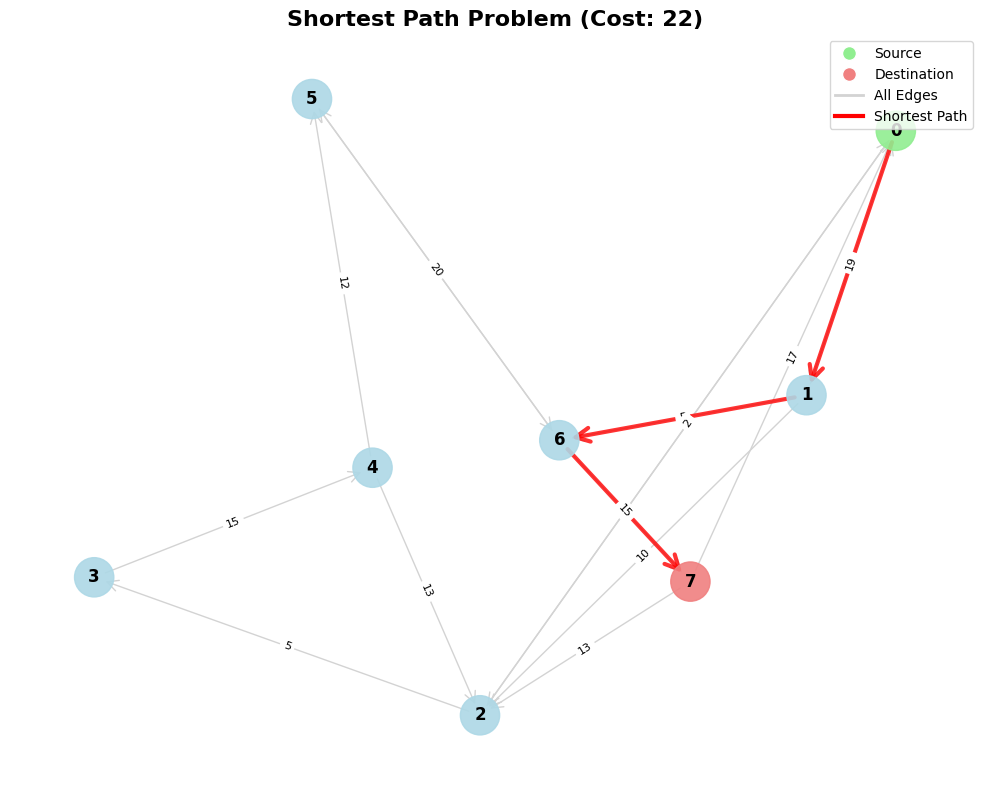


Demo completed successfully!


In [9]:
import gurobipy as gp
from gurobipy import GRB
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from typing import List, Tuple, Dict
import random

class ShortestPathSolver:
    """
    A class to generate, solve, and visualize shortest path problems using Gurobi.
    """
    
    def __init__(self, seed: int = 42):
        """Initialize the solver with a random seed for reproducibility."""
        random.seed(seed)
        np.random.seed(seed)
        self.graph = None
        self.solution = None
        
    def generate_instance(self, n_nodes: int = 10, n_edges: int = 20, 
                         max_cost: int = 100, source: int = 0, destination: int = None) -> Dict:
        """
        Generate a random shortest path instance.
        
        Parameters:
        - n_nodes: Number of nodes in the graph
        - n_edges: Number of edges in the graph
        - max_cost: Maximum cost for any edge
        - source: Source node index
        - destination: Destination node index (if None, uses last node)
        
        Returns:
        - Dictionary containing graph data
        """
        if destination is None:
            destination = n_nodes - 1
            
        # Generate random edges ensuring connectivity
        edges = []
        costs = {}
        
        # First, create a path from source to destination to ensure feasibility
        path_nodes = list(range(source, destination + 1))
        for i in range(len(path_nodes) - 1):
            edge = (path_nodes[i], path_nodes[i + 1])
            edges.append(edge)
            costs[edge] = random.randint(1, max_cost)
        
        # Add random edges
        while len(edges) < n_edges:
            i = random.randint(0, n_nodes - 1)
            j = random.randint(0, n_nodes - 1)
            
            if i != j and (i, j) not in edges:
                edges.append((i, j))
                costs[(i, j)] = random.randint(1, max_cost)
        
        self.graph = {
            'nodes': list(range(n_nodes)),
            'edges': edges,
            'costs': costs,
            'source': source,
            'destination': destination
        }
        
        return self.graph
    
    def solve(self, verbose: bool = True) -> Dict:
        """
        Solve the shortest path problem using Gurobi.
        
        Parameters:
        - verbose: Whether to print solver output
        
        Returns:
        - Dictionary containing solution information
        """
        if self.graph is None:
            raise ValueError("No instance generated. Call generate_instance() first.")
        
        # Create Gurobi model
        model = gp.Model("shortest_path")
        
        if not verbose:
            model.setParam('OutputFlag', 0)
        
        # Decision variables
        x = {}
        for edge in self.graph['edges']:
            i, j = edge
            x[i, j] = model.addVar(vtype=GRB.BINARY, name=f"x_{i}_{j}")
        
        # Objective function
        obj = gp.quicksum(self.graph['costs'][edge] * x[edge] for edge in self.graph['edges'])
        model.setObjective(obj, GRB.MINIMIZE)
        
        # Flow conservation constraints
        for node in self.graph['nodes']:
            # Outgoing flow - Incoming flow
            outgoing = gp.quicksum(x[i, j] for i, j in self.graph['edges'] if i == node)
            incoming = gp.quicksum(x[i, j] for i, j in self.graph['edges'] if j == node)
            
            if node == self.graph['source']:
                model.addConstr(outgoing - incoming == 1, f"flow_source_{node}")
            elif node == self.graph['destination']:
                model.addConstr(outgoing - incoming == -1, f"flow_dest_{node}")
            else:
                model.addConstr(outgoing - incoming == 0, f"flow_balance_{node}")
        
        # Solve the model
        model.optimize()
        
        # Extract solution
        if model.Status == GRB.OPTIMAL:
            solution_edges = []
            solution_cost = 0
            
            for edge in self.graph['edges']:
                if x[edge].X > 0.5:  # Binary variable is 1
                    solution_edges.append(edge)
                    solution_cost += self.graph['costs'][edge]
            
            # Reconstruct path
            path = self._reconstruct_path(solution_edges)
            
            self.solution = {
                'status': 'optimal',
                'objective_value': model.ObjVal,
                'solution_edges': solution_edges,
                'path': path,
                'solution_cost': solution_cost
            }
            
            if verbose:
                print(f"Optimal solution found!")
                print(f"Shortest path cost: {self.solution['objective_value']}")
                print(f"Path: {' -> '.join(map(str, path))}")
        
        else:
            self.solution = {'status': 'infeasible'}
            if verbose:
                print("No feasible solution found!")
        
        return self.solution
    
    def _reconstruct_path(self, solution_edges: List[Tuple[int, int]]) -> List[int]:
        """Reconstruct the path from source to destination using solution edges."""
        if not solution_edges:
            return []
        
        # Build adjacency list from solution edges
        adj = {}
        for i, j in solution_edges:
            adj[i] = j
        
        # Follow path from source to destination
        path = [self.graph['source']]
        current = self.graph['source']
        
        while current != self.graph['destination']:
            if current not in adj:
                break
            current = adj[current]
            path.append(current)
        
        return path
    
    def plot_solution(self, figsize: Tuple[int, int] = (12, 8)) -> None:
        """
        Plot the graph and highlight the shortest path solution.
        
        Parameters:
        - figsize: Figure size for the plot
        """
        if self.graph is None:
            raise ValueError("No instance generated. Call generate_instance() first.")
        
        # Create NetworkX graph for visualization
        G = nx.DiGraph()
        
        # Add nodes and edges
        G.add_nodes_from(self.graph['nodes'])
        for edge in self.graph['edges']:
            i, j = edge
            G.add_edge(i, j, weight=self.graph['costs'][edge])
        
        # Set up the plot
        plt.figure(figsize=figsize)
        pos = nx.spring_layout(G, seed=42, k=2, iterations=50)
        
        # Draw all edges in light gray
        nx.draw_networkx_edges(G, pos, edge_color='lightgray', arrows=True, 
                              arrowsize=20, arrowstyle='->', width=1)
        
        # Highlight solution edges if available
        if self.solution and self.solution['status'] == 'optimal':
            solution_edges = self.solution['solution_edges']
            nx.draw_networkx_edges(G, pos, edgelist=solution_edges, 
                                  edge_color='red', arrows=True, arrowsize=25,
                                  arrowstyle='->', width=3, alpha=0.8)
        
        # Draw nodes
        node_colors = []
        for node in G.nodes():
            if node == self.graph['source']:
                node_colors.append('lightgreen')
            elif node == self.graph['destination']:
                node_colors.append('lightcoral')
            else:
                node_colors.append('lightblue')
        
        nx.draw_networkx_nodes(G, pos, node_color=node_colors, 
                              node_size=800, alpha=0.9)
        
        # Add node labels
        nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
        
        # Add edge labels (costs)
        edge_labels = {(i, j): f"{self.graph['costs'][(i, j)]}" 
                      for i, j in self.graph['edges']}
        nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=8)
        
        # Add title and legend
        title = "Shortest Path Problem"
        if self.solution and self.solution['status'] == 'optimal':
            title += f" (Cost: {self.solution['objective_value']:.0f})"
        plt.title(title, fontsize=16, fontweight='bold')
        
        # Create legend
        legend_elements = [
            plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightgreen', 
                      markersize=10, label='Source'),
            plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightcoral', 
                      markersize=10, label='Destination'),
            plt.Line2D([0], [0], color='lightgray', linewidth=2, label='All Edges'),
        ]
        
        if self.solution and self.solution['status'] == 'optimal':
            legend_elements.append(
                plt.Line2D([0], [0], color='red', linewidth=3, label='Shortest Path')
            )
        
        plt.legend(handles=legend_elements, loc='upper right')
        plt.axis('off')
        plt.tight_layout()
        plt.show()

# Example usage and demonstration
def main():
    """Main function demonstrating the shortest path solver."""
    print("=" * 60)
    print("SHORTEST PATH PROBLEM SOLVER WITH GUROBI")
    print("=" * 60)
    
    # Initialize solver
    solver = ShortestPathSolver(seed=43)
    
    # Generate instance
    print("\n1. GENERATING RANDOM INSTANCE")
    print("-" * 40)
    instance = solver.generate_instance(n_nodes=8, n_edges=15, max_cost=20)
    
    print(f"Generated graph with {len(instance['nodes'])} nodes and {len(instance['edges'])} edges")
    print(f"Source: {instance['source']}, Destination: {instance['destination']}")
    print(f"Edges: {instance['edges'][:5]}..." if len(instance['edges']) > 5 else f"Edges: {instance['edges']}")
    
    # Solve the problem
    print("\n2. SOLVING WITH GUROBI")
    print("-" * 40)
    solution = solver.solve(verbose=True)
    
    # Display detailed results
    if solution['status'] == 'optimal':
        print(f"\nDetailed Results:")
        print(f"  - Optimal cost: {solution['objective_value']}")
        print(f"  - Solution edges: {solution['solution_edges']}")
        print(f"  - Complete path: {solution['path']}")
        
        # Verify solution manually
        manual_cost = sum(instance['costs'][edge] for edge in solution['solution_edges'])
        print(f"  - Manual verification: {manual_cost} (should match optimal cost)")
    
    # Plot the solution
    print("\n3. VISUALIZING SOLUTION")
    print("-" * 40)
    solver.plot_solution(figsize=(10, 8))
    
    print("\nDemo completed successfully!")

if __name__ == "__main__":
    main()

# N-Queens Problem with GurobiPy

## Mathematical Formulation

The N-Queens problem is a classic constraint satisfaction and combinatorial optimization problem. The goal is to place $N$ queens on an $N \times N$ chessboard such that no two queens attack each other. Queens can attack any piece on the same row, column, or diagonal.

### Problem Definition

Given an $N \times N$ chessboard, we want to place exactly $N$ queens such that:
- **No two queens share the same row**
- **No two queens share the same column**
- **No two queens share the same diagonal** (both main diagonal and anti-diagonal)

### Decision Variables

Let $x_{ij} \in \{0, 1\}$ be a binary decision variable for each position $(i,j)$ on the board where $i, j \in \{1, 2, \ldots, N\}$:

$$x_{ij} = \begin{cases}
1 & \text{if a queen is placed at position } (i,j) \\
0 & \text{if no queen is placed at position } (i,j)
\end{cases}$$

**Board Indexing Convention:**
- $i$ represents the **row** (1 to N from top to bottom)
- $j$ represents the **column** (1 to N from left to right)
- Position $(1,1)$ is the top-left corner
- Position $(N,N)$ is the bottom-right corner

### Objective Function

Since this is a **feasibility problem**, we can use any objective or simply find a feasible solution. Common approaches:

**Option 1: Feasibility (no objective)**
$$\text{Find any solution satisfying all constraints}$$

**Option 2: Minimize total number of queens (should equal N)**
$$\min \sum_{i=1}^{N} \sum_{j=1}^{N} x_{ij}$$

**Option 3: Maximize total number of queens (should equal N)**
$$\max \sum_{i=1}^{N} \sum_{j=1}^{N} x_{ij}$$

For our implementation, we'll use the minimization approach to ensure we place exactly $N$ queens.

### Constraints

#### 1. Row Constraints (Exactly One Queen Per Row)

Each row must contain exactly one queen:

$$\sum_{j=1}^{N} x_{ij} = 1 \quad \forall i \in \{1, 2, \ldots, N\}$$

**Detailed Explanation:**

- **Left Hand Side:** $\sum_{j=1}^{N} x_{ij}$ counts the number of queens in row $i$
  - Sums over all columns $j$ in row $i$
  - If $x_{ij} = 1$, then position $(i,j)$ has a queen
  - If $x_{ij} = 0$, then position $(i,j)$ is empty

- **Right Hand Side:** $= 1$ ensures exactly one queen per row
  - Cannot be $< 1$ (would leave a row empty, violating the N-Queens requirement)
  - Cannot be $> 1$ (would place multiple queens in the same row, causing attacks)

**Explicit Form for Each Row:**
- Row 1: $x_{11} + x_{12} + \cdots + x_{1N} = 1$
- Row 2: $x_{21} + x_{22} + \cdots + x_{2N} = 1$
- $\vdots$
- Row N: $x_{N1} + x_{N2} + \cdots + x_{NN} = 1$

**Physical Interpretation:**
- Since we need exactly $N$ queens on an $N \times N$ board
- And no two queens can share a row
- Each of the $N$ rows must contain exactly one queen

#### 2. Column Constraints (Exactly One Queen Per Column)

Each column must contain exactly one queen:

$$\sum_{i=1}^{N} x_{ij} = 1 \quad \forall j \in \{1, 2, \ldots, N\}$$

**Detailed Explanation:**

- **Left Hand Side:** $\sum_{i=1}^{N} x_{ij}$ counts the number of queens in column $j$
  - Sums over all rows $i$ in column $j$
  - Ensures vertical uniqueness of queen placement

- **Symmetry with Row Constraints:** These constraints are symmetric to row constraints
  - Row constraints ensure horizontal uniqueness
  - Column constraints ensure vertical uniqueness

**Explicit Form for Each Column:**
- Column 1: $x_{11} + x_{21} + \cdots + x_{N1} = 1$
- Column 2: $x_{12} + x_{22} + \cdots + x_{N2} = 1$
- $\vdots$
- Column N: $x_{1N} + x_{2N} + \cdots + x_{NN} = 1$

#### 3. Main Diagonal Constraints (At Most One Queen Per Main Diagonal)

Queens cannot attack along main diagonals (top-left to bottom-right direction):

$$\sum_{i,j: i-j=k} x_{ij} \leq 1 \quad \forall k \in \{-(N-1), -(N-2), \ldots, 0, \ldots, N-2, N-1\}$$

**Diagonal Identification:**
- Main diagonals are characterized by constant values of $i - j$
- **Main diagonal** (center): $i - j = 0$ → positions $(1,1), (2,2), \ldots, (N,N)$
- **Upper diagonals**: $i - j < 0$ → positions above the main diagonal
- **Lower diagonals**: $i - j > 0$ → positions below the main diagonal

**Detailed Analysis:**

For an $N \times N$ board, the main diagonals are:
- $k = -(N-1)$: only position $(1,N)$
- $k = -(N-2)$: positions $(1,N-1), (2,N)$
- $\vdots$
- $k = 0$: positions $(1,1), (2,2), \ldots, (N,N)$ (main diagonal)
- $\vdots$  
- $k = N-2$: positions $(N-1,1), (N,2)$
- $k = N-1$: only position $(N,1)$

**Why $\leq 1$ instead of $= 1$?**
- Not every diagonal needs a queen (unlike rows and columns)
- Some diagonals may remain empty in a valid solution
- We only need to ensure **at most** one queen per diagonal

**Example for N=4:**
```
Main Diagonals (i-j = constant):
k=-3: (1,4)
k=-2: (1,3), (2,4)  
k=-1: (1,2), (2,3), (3,4)
k=0:  (1,1), (2,2), (3,3), (4,4)
k=1:  (2,1), (3,2), (4,3)
k=2:  (3,1), (4,2)
k=3:  (4,1)
```

#### 4. Anti-Diagonal Constraints (At Most One Queen Per Anti-Diagonal)

Queens cannot attack along anti-diagonals (top-right to bottom-left direction):

$$\sum_{i,j: i+j=s} x_{ij} \leq 1 \quad \forall s \in \{2, 3, \ldots, 2N\}$$

**Anti-Diagonal Identification:**
- Anti-diagonals are characterized by constant values of $i + j$
- **Main anti-diagonal** (center): $i + j = N + 1$
- **Upper anti-diagonals**: $i + j < N + 1$
- **Lower anti-diagonals**: $i + j > N + 1$

**Detailed Analysis:**

For an $N \times N$ board, the anti-diagonals are:
- $s = 2$: only position $(1,1)$
- $s = 3$: positions $(1,2), (2,1)$
- $\vdots$
- $s = N + 1$: positions $(1,N), (2,N-1), \ldots, (N,1)$ (main anti-diagonal)
- $\vdots$
- $s = 2N-1$: positions $(N-1,N), (N,N-1)$
- $s = 2N$: only position $(N,N)$

**Example for N=4:**
```
Anti-Diagonals (i+j = constant):
s=2: (1,1)
s=3: (1,2), (2,1)
s=4: (1,3), (2,2), (3,1)
s=5: (1,4), (2,3), (3,2), (4,1)
s=6: (2,4), (3,3), (4,2)
s=7: (3,4), (4,3)
s=8: (4,4)
```

#### 5. Binary Constraints

$$x_{ij} \in \{0, 1\} \quad \forall i,j \in \{1, 2, \ldots, N\}$$

**Interpretation:**
- Each position either has a queen (1) or doesn't (0)
- No partial queen placements allowed
- Makes the problem a **binary integer programming** problem

#### 6. Alternative Constraint Formulations

**Compact Diagonal Constraints:**

Main diagonals can be written more compactly as:
$$\sum_{\substack{i,j \in \{1,\ldots,N\} \\ i-j=k}} x_{ij} \leq 1 \quad \forall k \in \{-(N-1), \ldots, N-1\}$$

Anti-diagonals can be written as:
$$\sum_{\substack{i,j \in \{1,\ldots,N\} \\ i+j=s}} x_{ij} \leq 1 \quad \forall s \in \{2, \ldots, 2N\}$$

**Matrix Formulation:**

Let $\mathbf{X} \in \{0,1\}^{N \times N}$ be the matrix of decision variables. Then:
- Row constraints: $\mathbf{X} \mathbf{1} = \mathbf{1}$ (where $\mathbf{1}$ is vector of ones)
- Column constraints: $\mathbf{X}^T \mathbf{1} = \mathbf{1}$
- Diagonal constraints: more complex to express in matrix form

#### 7. Constraint Analysis and Properties

**Feasibility Analysis:**
- A solution is feasible if and only if all four constraint types are satisfied
- Not all values of $N$ have solutions (e.g., N=2 and N=3 are impossible)
- For $N \geq 4$, solutions always exist

**Constraint Redundancy:**
- Row and column constraints together ensure exactly $N$ queens
- If we have exactly $N$ queens with unique rows and columns, diagonal constraints become the only additional restrictions

**Solution Uniqueness:**
- Most values of $N$ have multiple solutions
- Solutions can be related by board transformations (rotation, reflection)
- Fundamental solutions exclude symmetric equivalents

#### 8. Constraint Validation Example

Consider N=4 with solution at positions $(2,1), (4,2), (1,3), (3,4)$:

**Row Constraints:**
- Row 1: $x_{11} + x_{12} + x_{13} + x_{14} = 0 + 0 + 1 + 0 = 1$ ✓
- Row 2: $x_{21} + x_{22} + x_{23} + x_{24} = 1 + 0 + 0 + 0 = 1$ ✓
- Row 3: $x_{31} + x_{32} + x_{33} + x_{34} = 0 + 0 + 0 + 1 = 1$ ✓
- Row 4: $x_{41} + x_{42} + x_{43} + x_{44} = 0 + 1 + 0 + 0 = 1$ ✓

**Column Constraints:**
- Column 1: $x_{11} + x_{21} + x_{31} + x_{41} = 0 + 1 + 0 + 0 = 1$ ✓
- Column 2: $x_{12} + x_{22} + x_{32} + x_{42} = 0 + 0 + 0 + 1 = 1$ ✓
- Column 3: $x_{13} + x_{23} + x_{33} + x_{43} = 1 + 0 + 0 + 0 = 1$ ✓
- Column 4: $x_{14} + x_{24} + x_{34} + x_{44} = 0 + 0 + 1 + 0 = 1$ ✓

**Main Diagonal Constraints (sample):**
- $k=0$ (main diagonal): $x_{11} + x_{22} + x_{33} + x_{44} = 0 + 0 + 0 + 0 = 0 \leq 1$ ✓
- $k=1$: $x_{21} + x_{32} + x_{43} = 1 + 0 + 0 = 1 \leq 1$ ✓

**Anti-Diagonal Constraints (sample):**
- $s=5$ (main anti-diagonal): $x_{14} + x_{23} + x_{32} + x_{41} = 0 + 0 + 0 + 0 = 0 \leq 1$ ✓

This demonstrates how the constraints ensure a valid N-Queens solution.

## Python Implementation

N-QUEENS PROBLEM SOLVER WITH GUROBI

==================== N = 4 ====================

1. SOLVING 4-QUEENS PROBLEM
----------------------------------------
Set parameter TimeLimit to value 30
Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (mac64[arm] - Darwin 24.6.0 24G84)

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Non-default parameters:
TimeLimit  30

Optimize a model with 22 rows, 16 columns and 64 nonzeros
Model fingerprint: 0x5e884932
Variable types: 0 continuous, 16 integer (16 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 4.0000000
Presolve removed 22 rows and 16 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.00 seconds (0.00 work units)
Thread count was 1 (of 12 available processors)

Solution c

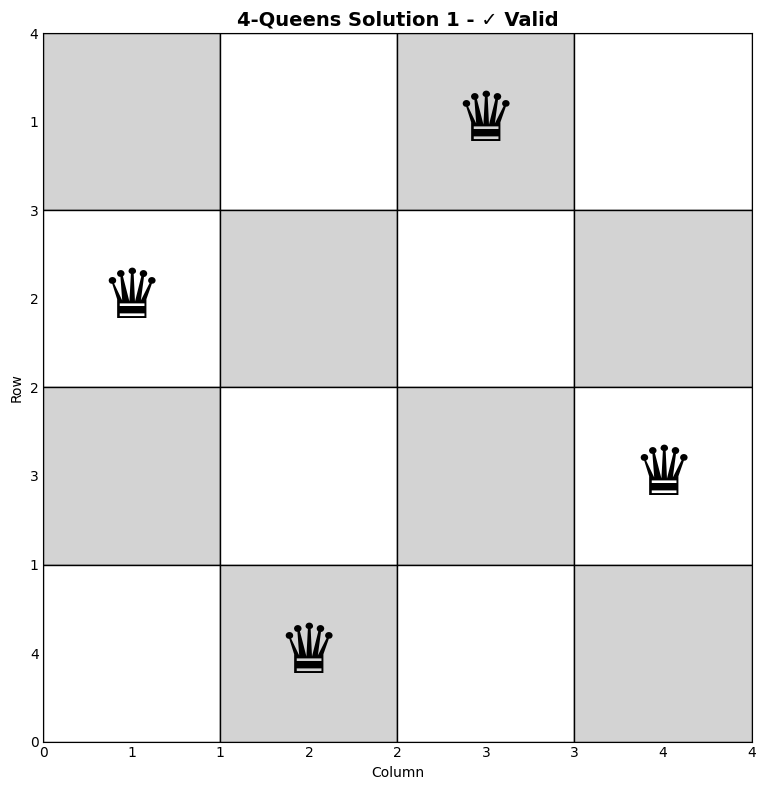


3. FINDING MULTIPLE SOLUTIONS
----------------------------------------
Finding multiple solutions for 4-Queens problem...
Set parameter TimeLimit to value 60
Set parameter LazyConstraints to value 1
Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (mac64[arm] - Darwin 24.6.0 24G84)

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Non-default parameters:
TimeLimit  60
LazyConstraints  1

Optimize a model with 22 rows, 16 columns and 64 nonzeros
Model fingerprint: 0x5e884932
Variable types: 0 continuous, 16 integer (16 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found solution 1: [(0, 2), (1, 0), (2, 3), (3, 1)]
Presolve removed 22 rows and 15 columns
Presolve time: 0.00s
Presolved: 0 rows, 1 columns, 0 nonzeros
Variable types: 0 continuous, 1 integer (1 binary)

Root relaxation: objective 4.000000e+00, 0 iter

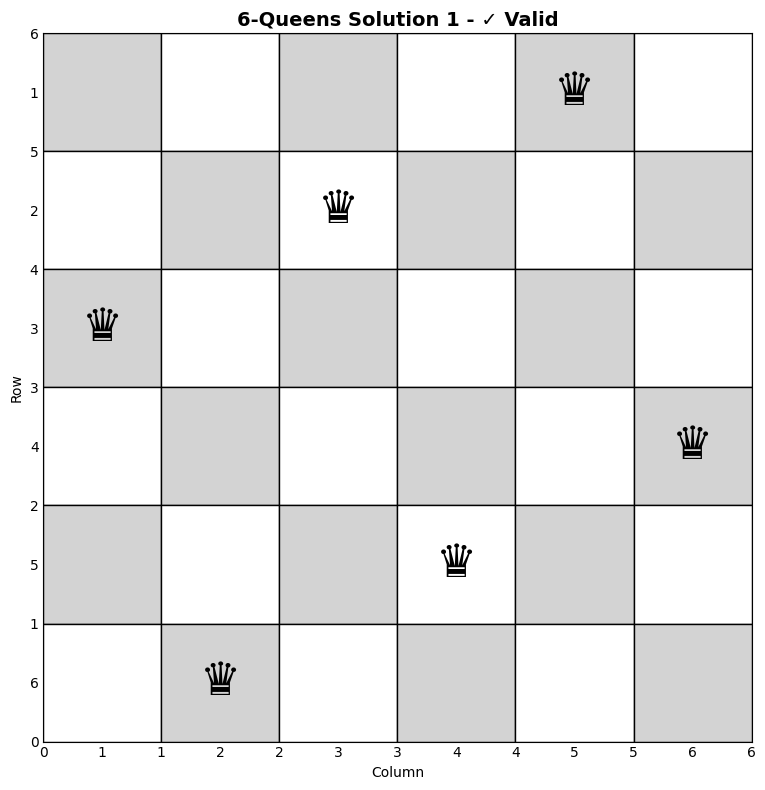


3. FINDING MULTIPLE SOLUTIONS
----------------------------------------
Finding multiple solutions for 6-Queens problem...
Set parameter TimeLimit to value 60
Set parameter LazyConstraints to value 1
Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (mac64[arm] - Darwin 24.6.0 24G84)

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Non-default parameters:
TimeLimit  60
LazyConstraints  1

Optimize a model with 34 rows, 36 columns and 144 nonzeros
Model fingerprint: 0x4dd27f41
Variable types: 0 continuous, 36 integer (36 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found solution 1: [(0, 4), (1, 2), (2, 0), (3, 5), (4, 3), (5, 1)]
Presolve removed 4 rows and 0 columns
Presolve time: 0.00s
Presolved: 30 rows, 36 columns, 158 nonzeros
Variable types: 0 continuous, 36 integer (36 binary)

Root relaxation: objective

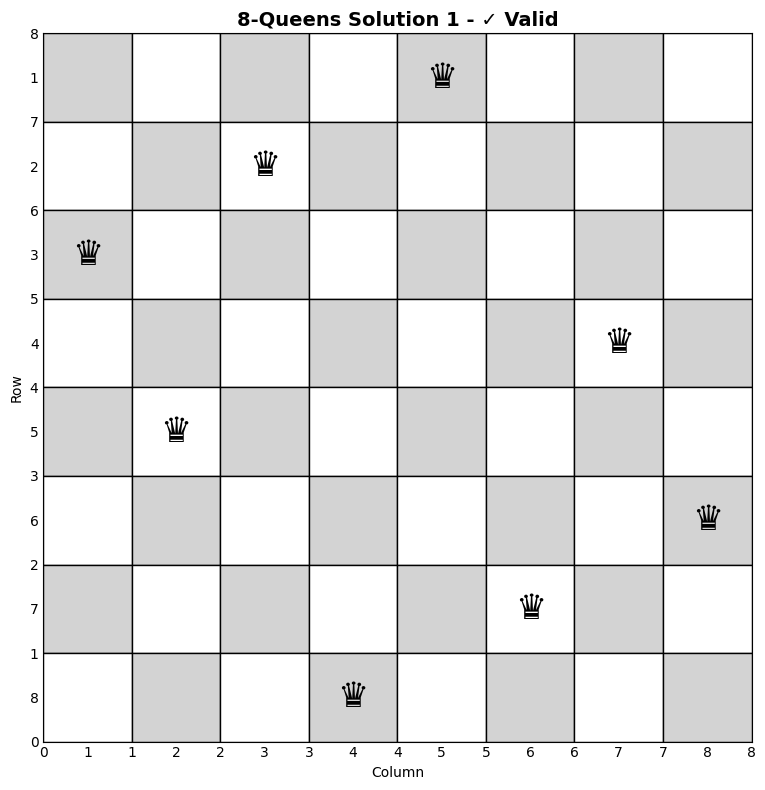


3. FINDING MULTIPLE SOLUTIONS
----------------------------------------
Finding multiple solutions for 8-Queens problem...
Set parameter TimeLimit to value 60
Set parameter LazyConstraints to value 1
Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (mac64[arm] - Darwin 24.6.0 24G84)

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Non-default parameters:
TimeLimit  60
LazyConstraints  1

Optimize a model with 46 rows, 64 columns and 256 nonzeros
Model fingerprint: 0x63a265dd
Variable types: 0 continuous, 64 integer (64 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found solution 1: [(0, 4), (1, 2), (2, 0), (3, 6), (4, 1), (5, 7), (6, 5), (7, 3)]
Presolve removed 4 rows and 0 columns
Presolve time: 0.00s
Presolved: 42 rows, 64 columns, 270 nonzeros
Variable types: 0 continuous, 64 integer (64 binary)

Root relax

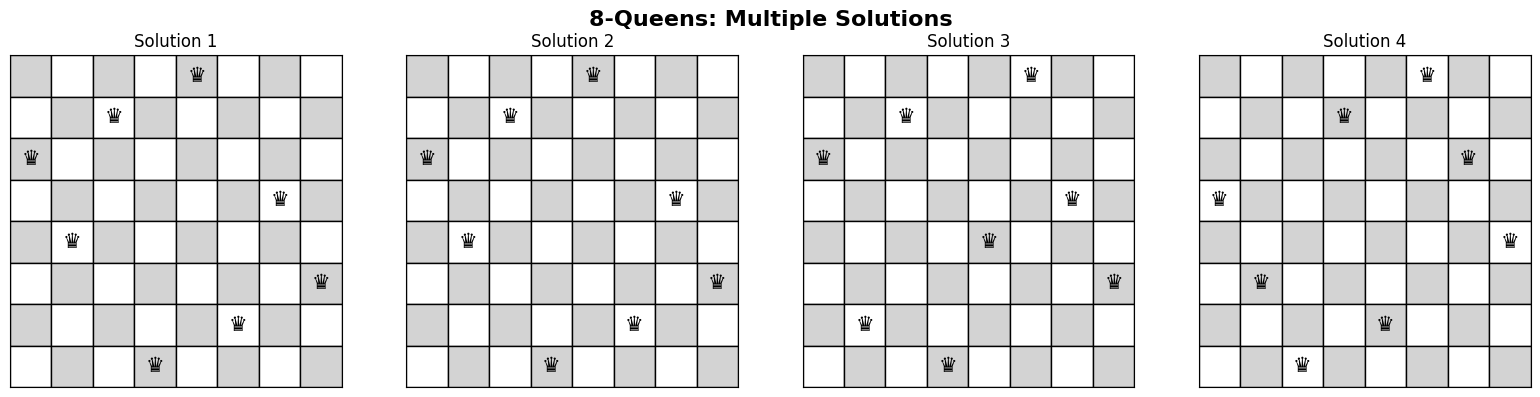


4. COMPARING SOLUTION METHODS
----------------------------------------
Comparing solution methods for 8-Queens problem...

Method Comparison for 8-Queens:
Method          Status     Time (s)   Solution Found
--------------------------------------------------
Gurobi          optimal    0.003      True
Backtracking    optimal    0.000      True

==================== N = 12 ====================

1. SOLVING 12-QUEENS PROBLEM
----------------------------------------
Set parameter TimeLimit to value 30
Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (mac64[arm] - Darwin 24.6.0 24G84)

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Non-default parameters:
TimeLimit  30

Optimize a model with 70 rows, 144 columns and 576 nonzeros
Model fingerprint: 0xe8a84ed2
Variable types: 0 continuous, 144 integer (144 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00

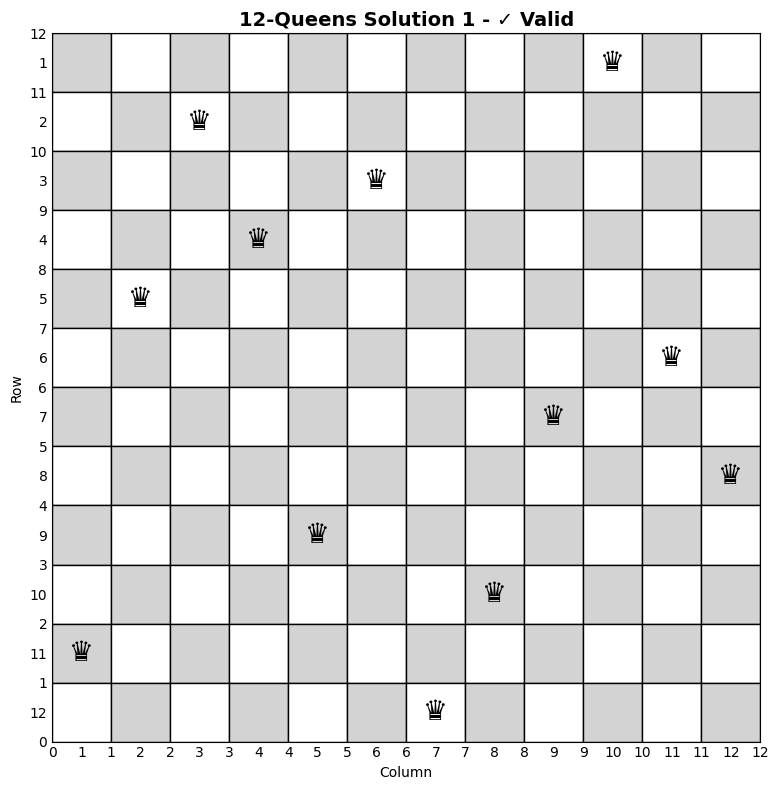


4. COMPARING SOLUTION METHODS
----------------------------------------
Comparing solution methods for 12-Queens problem...

Method Comparison for 12-Queens:
Method          Status     Time (s)   Solution Found
--------------------------------------------------
Gurobi          optimal    0.004      True
Backtracking    optimal    0.001      True

5. COMPLEXITY ANALYSIS
----------------------------------------
N-Queens Complexity Analysis
Testing N=4... Time: 0.001s, Status: optimal
Testing N=5... Time: 0.001s, Status: optimal
Testing N=6... Time: 0.001s, Status: optimal
Testing N=7... Time: 0.002s, Status: optimal
Testing N=8... Time: 0.002s, Status: optimal
Testing N=9... Time: 0.002s, Status: optimal
Testing N=10... Time: 0.002s, Status: optimal


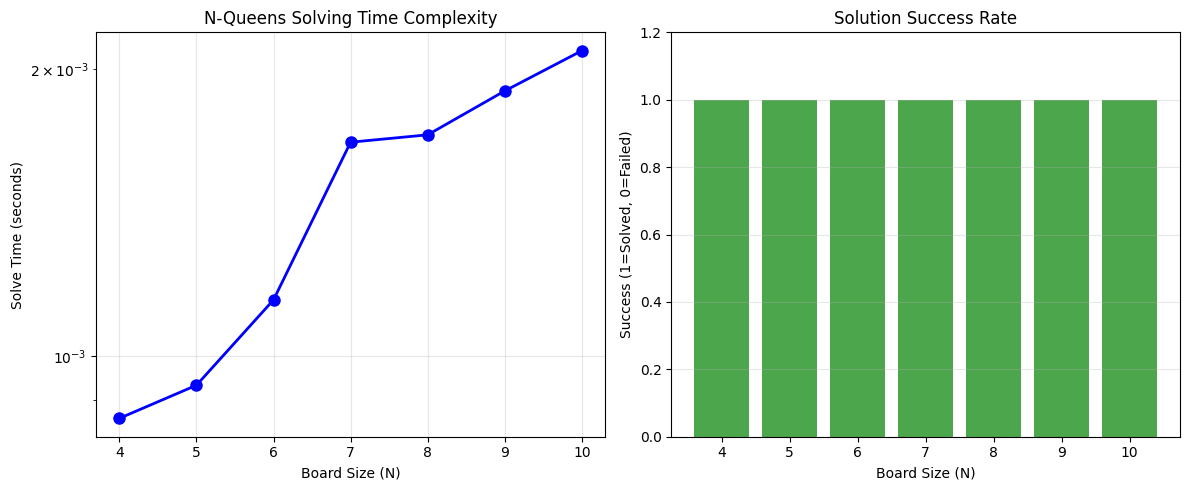


CONSTRAINT VALIDATION EXAMPLE
4-Queens solution: [(0, 2), (1, 0), (2, 3), (3, 1)]

Detailed Constraint Verification:
----------------------------------------
Queen rows: [0, 1, 2, 3]
Unique rows: 4 (should be 4) ✓
Queen columns: [2, 0, 3, 1]
Unique columns: 4 (should be 4) ✓
Main diagonals (i-j): [-2, 1, -1, 2]
Unique main diagonals: 4 (should be 4) ✓
Anti-diagonals (i+j): [2, 1, 5, 4]
Unique anti-diagonals: 4 (should be 4) ✓

All constraints satisfied! ✓

Board with attack visualization:


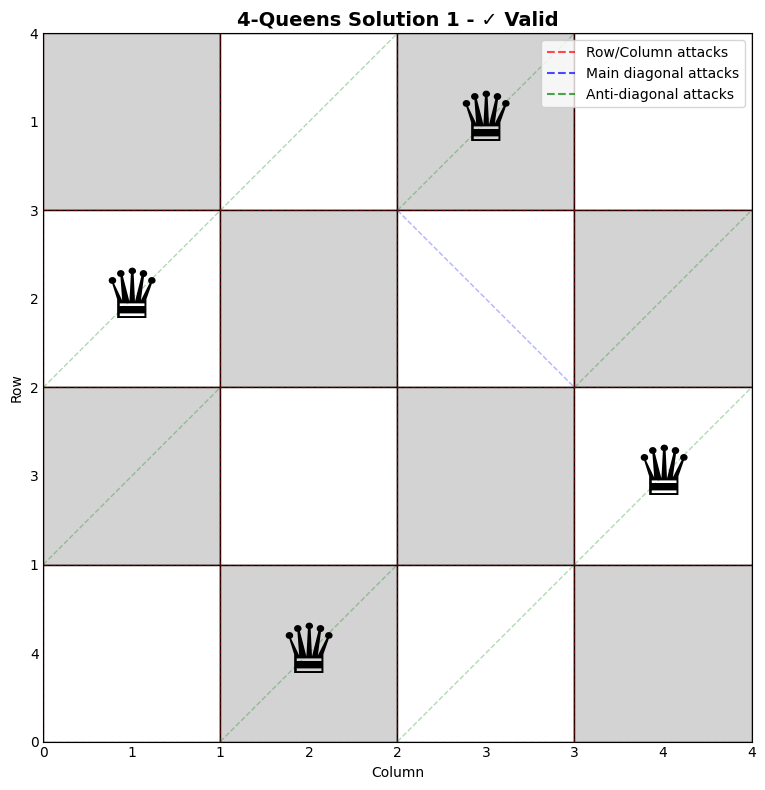


Demo completed successfully!


In [10]:
import gurobipy as gp
from gurobipy import GRB
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from typing import List, Tuple, Dict, Optional
import random
import time

class NQueensSolver:
    """
    A class to solve and visualize N-Queens problems using Gurobi.
    """
    
    def __init__(self, seed: int = 42):
        """Initialize the solver with a random seed for reproducibility."""
        random.seed(seed)
        np.random.seed(seed)
        self.n = None
        self.solution = None
        self.model = None
        
    def solve(self, n: int, verbose: bool = True, time_limit: int = 60, 
              find_all: bool = False, max_solutions: int = 10) -> Dict:
        """
        Solve the N-Queens problem using Gurobi.
        
        Parameters:
        - n: Board size (N x N)
        - verbose: Whether to print solver output
        - time_limit: Maximum time in seconds for solving
        - find_all: Whether to find multiple solutions
        - max_solutions: Maximum number of solutions to find
        
        Returns:
        - Dictionary containing solution information
        """
        self.n = n
        
        # Check for impossible cases
        if n == 2 or n == 3:
            return {
                'status': 'impossible',
                'message': f'N-Queens problem has no solution for N={n}',
                'n': n
            }
        
        # Create Gurobi model
        self.model = gp.Model(f"n_queens_{n}")
        
        if not verbose:
            self.model.setParam('OutputFlag', 0)
        
        self.model.setParam('TimeLimit', time_limit)
        
        # Decision variables: x[i,j] = 1 if queen at position (i,j)
        x = {}
        for i in range(n):
            for j in range(n):
                x[i, j] = self.model.addVar(vtype=GRB.BINARY, name=f"x_{i}_{j}")
        
        # Objective: minimize number of queens (should be exactly N)
        obj = gp.quicksum(x[i, j] for i in range(n) for j in range(n))
        self.model.setObjective(obj, GRB.MINIMIZE)
        
        # Constraint 1: Exactly one queen per row
        for i in range(n):
            self.model.addConstr(
                gp.quicksum(x[i, j] for j in range(n)) == 1,
                f"row_{i}"
            )
        
        # Constraint 2: Exactly one queen per column
        for j in range(n):
            self.model.addConstr(
                gp.quicksum(x[i, j] for i in range(n)) == 1,
                f"col_{j}"
            )
        
        # Constraint 3: At most one queen per main diagonal (i - j = constant)
        for k in range(-(n-1), n):
            diagonal_vars = []
            for i in range(n):
                for j in range(n):
                    if i - j == k:
                        diagonal_vars.append(x[i, j])
            
            if diagonal_vars:
                self.model.addConstr(
                    gp.quicksum(diagonal_vars) <= 1,
                    f"main_diag_{k}"
                )
        
        # Constraint 4: At most one queen per anti-diagonal (i + j = constant)
        for s in range(2 * n - 1):
            anti_diagonal_vars = []
            for i in range(n):
                for j in range(n):
                    if i + j == s:
                        anti_diagonal_vars.append(x[i, j])
            
            if anti_diagonal_vars:
                self.model.addConstr(
                    gp.quicksum(anti_diagonal_vars) <= 1,
                    f"anti_diag_{s}"
                )
        
        # Store solutions
        solutions = []
        
        if find_all:
            # Find multiple solutions using solution callback
            def solution_callback(model, where):
                if where == GRB.Callback.MIPSOL:
                    if len(solutions) < max_solutions:
                        # Extract current solution
                        current_solution = []
                        for i in range(n):
                            for j in range(n):
                                if model.cbGetSolution(x[i, j]) > 0.5:
                                    current_solution.append((i, j))
                        solutions.append(current_solution)
                        
                        if verbose and len(solutions) <= 5:  # Show first few solutions
                            print(f"Found solution {len(solutions)}: {current_solution}")
                        
                        # Add constraint to exclude this solution
                        model.cbLazy(
                            gp.quicksum(x[i, j] for i, j in current_solution) <= n - 1
                        )
            
            # Enable lazy constraints for solution enumeration
            self.model.setParam('LazyConstraints', 1)
            self.model.optimize(solution_callback)
        else:
            # Find single solution
            self.model.optimize()
        
        # Process results
        if self.model.Status == GRB.OPTIMAL:
            if not find_all:
                # Extract single solution
                queen_positions = []
                board = np.zeros((n, n), dtype=int)
                
                for i in range(n):
                    for j in range(n):
                        if x[i, j].X > 0.5:
                            queen_positions.append((i, j))
                            board[i, j] = 1
                
                solutions = [queen_positions]
            
            self.solution = {
                'status': 'optimal',
                'n': n,
                'n_solutions': len(solutions),
                'solutions': solutions,
                'primary_solution': solutions[0] if solutions else [],
                'solve_time': self.model.Runtime,
                'objective_value': self.model.ObjVal if not find_all else n
            }
            
            if verbose:
                print(f"\nSolution found for {n}-Queens problem!")
                print(f"Number of solutions found: {len(solutions)}")
                print(f"Primary solution positions: {solutions[0] if solutions else 'None'}")
                print(f"Solve time: {self.model.Runtime:.3f} seconds")
                
        elif self.model.Status == GRB.TIME_LIMIT:
            self.solution = {
                'status': 'time_limit',
                'n': n,
                'n_solutions': len(solutions),
                'solutions': solutions,
                'solve_time': self.model.Runtime
            }
            if verbose:
                print(f"Time limit reached. Found {len(solutions)} solutions.")
                
        else:
            self.solution = {
                'status': 'no_solution',
                'n': n,
                'message': 'No feasible solution found'
            }
            if verbose:
                print("No feasible solution found!")
        
        return self.solution
    
    def get_board_matrix(self, solution_index: int = 0) -> np.ndarray:
        """
        Convert solution to board matrix representation.
        
        Parameters:
        - solution_index: Which solution to use (if multiple found)
        
        Returns:
        - numpy array representing the board (1 = queen, 0 = empty)
        """
        if not self.solution or not self.solution.get('solutions'):
            raise ValueError("No solution available")
        
        if solution_index >= len(self.solution['solutions']):
            raise ValueError(f"Solution index {solution_index} not available")
        
        board = np.zeros((self.n, self.n), dtype=int)
        queen_positions = self.solution['solutions'][solution_index]
        
        for i, j in queen_positions:
            board[i, j] = 1
        
        return board
    
    def verify_solution(self, solution_index: int = 0) -> Dict:
        """
        Verify that a solution satisfies all N-Queens constraints.
        
        Parameters:
        - solution_index: Which solution to verify
        
        Returns:
        - Dictionary with verification results
        """
        if not self.solution or not self.solution.get('solutions'):
            return {'valid': False, 'reason': 'No solution to verify'}
        
        queen_positions = self.solution['solutions'][solution_index]
        n = self.n
        
        # Check if we have exactly N queens
        if len(queen_positions) != n:
            return {
                'valid': False, 
                'reason': f'Expected {n} queens, found {len(queen_positions)}'
            }
        
        # Extract positions
        rows = [pos[0] for pos in queen_positions]
        cols = [pos[1] for pos in queen_positions]
        
        # Check row uniqueness
        if len(set(rows)) != n:
            return {'valid': False, 'reason': 'Queens share rows'}
        
        # Check column uniqueness
        if len(set(cols)) != n:
            return {'valid': False, 'reason': 'Queens share columns'}
        
        # Check main diagonal uniqueness (i - j)
        main_diags = [pos[0] - pos[1] for pos in queen_positions]
        if len(set(main_diags)) != n:
            return {'valid': False, 'reason': 'Queens share main diagonals'}
        
        # Check anti-diagonal uniqueness (i + j)  
        anti_diags = [pos[0] + pos[1] for pos in queen_positions]
        if len(set(anti_diags)) != n:
            return {'valid': False, 'reason': 'Queens share anti-diagonals'}
        
        return {
            'valid': True,
            'n_queens': len(queen_positions),
            'unique_rows': len(set(rows)),
            'unique_cols': len(set(cols)),
            'unique_main_diags': len(set(main_diags)),
            'unique_anti_diags': len(set(anti_diags))
        }
    
    def plot_solution(self, solution_index: int = 0, figsize: Tuple[int, int] = (8, 8),
                     show_attacks: bool = False) -> None:
        """
        Visualize the N-Queens solution on a chessboard.
        
        Parameters:
        - solution_index: Which solution to plot
        - figsize: Figure size for the plot
        - show_attacks: Whether to show queen attack lines
        """
        if not self.solution or not self.solution.get('solutions'):
            print("No solution to plot!")
            return
        
        if solution_index >= len(self.solution['solutions']):
            print(f"Solution index {solution_index} not available!")
            return
        
        board = self.get_board_matrix(solution_index)
        queen_positions = self.solution['solutions'][solution_index]
        n = self.n
        
        fig, ax = plt.subplots(figsize=figsize)
        
        # Create chessboard pattern
        for i in range(n):
            for j in range(n):
                color = 'lightgray' if (i + j) % 2 == 0 else 'white'
                square = patches.Rectangle((j, n-1-i), 1, 1, 
                                         facecolor=color, edgecolor='black', linewidth=1)
                ax.add_patch(square)
        
        # Add attack lines if requested
        if show_attacks:
            for qi, qj in queen_positions:
                # Horizontal line
                ax.plot([0, n], [n-1-qi, n-1-qi], 'r--', alpha=0.3, linewidth=1)
                # Vertical line  
                ax.plot([qj, qj], [0, n], 'r--', alpha=0.3, linewidth=1)
                
                # Main diagonal (i-j = constant)
                for x in range(n):
                    y = x - qj + qi
                    if 0 <= y < n:
                        if x == 0 or x == n-1 or y == 0 or y == n-1:
                            ax.plot([qj-qi+x, qj-qi+x+1], [n-1-y, n-1-y-1], 
                                   'b--', alpha=0.3, linewidth=1)
                
                # Anti-diagonal (i+j = constant)
                for x in range(n):
                    y = qi + qj - x
                    if 0 <= y < n:
                        if x == 0 or x == n-1 or y == 0 or y == n-1:
                            ax.plot([x, x+1], [n-1-y, n-1-y+1], 
                                   'g--', alpha=0.3, linewidth=1)
        
        # Place queens
        for i, j in queen_positions:
            # Queen symbol at center of square
            ax.text(j + 0.5, n - 1 - i + 0.5, '♛', 
                   fontsize=max(20, 200//n), ha='center', va='center', 
                   color='black', weight='bold')
        
        # Set up the plot
        ax.set_xlim(0, n)
        ax.set_ylim(0, n)
        ax.set_aspect('equal')
        ax.set_xticks(range(n+1))
        ax.set_yticks(range(n+1))
        
        # Add coordinate labels
        ax.set_xticks(np.arange(0.5, n, 1), minor=True)
        ax.set_yticks(np.arange(0.5, n, 1), minor=True)
        ax.set_xticklabels([str(i+1) for i in range(n)], minor=True)
        ax.set_yticklabels([str(n-i) for i in range(n)], minor=True)
        
        # Remove major ticks
        ax.tick_params(which='major', length=0)
        ax.tick_params(which='minor', length=0)
        
        verification = self.verify_solution(solution_index)
        status = "✓ Valid" if verification['valid'] else "✗ Invalid"
        
        title = f"{n}-Queens Solution {solution_index + 1}"
        if len(self.solution['solutions']) > 1:
            title += f" (of {len(self.solution['solutions'])})"
        title += f" - {status}"
        
        plt.title(title, fontsize=14, weight='bold')
        plt.xlabel('Column')
        plt.ylabel('Row')
        
        if show_attacks:
            # Add legend for attack lines
            from matplotlib.lines import Line2D
            legend_elements = [
                Line2D([0], [0], color='red', linestyle='--', alpha=0.7, 
                      label='Row/Column attacks'),
                Line2D([0], [0], color='blue', linestyle='--', alpha=0.7, 
                      label='Main diagonal attacks'),
                Line2D([0], [0], color='green', linestyle='--', alpha=0.7, 
                      label='Anti-diagonal attacks')
            ]
            ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1, 1))
        
        plt.tight_layout()
        plt.show()
    
    def compare_solution_methods(self, n: int) -> Dict:
        """
        Compare Gurobi solution with backtracking heuristic.
        
        Parameters:
        - n: Board size
        
        Returns:
        - Dictionary comparing different solution methods
        """
        print(f"Comparing solution methods for {n}-Queens problem...")
        
        # Solve with Gurobi
        start_time = time.time()
        gurobi_result = self.solve(n, verbose=False)
        gurobi_time = time.time() - start_time
        
        # Simple backtracking heuristic
        start_time = time.time()
        backtrack_result = self._solve_backtracking(n)
        backtrack_time = time.time() - start_time
        
        comparison = {
            'n': n,
            'gurobi': {
                'status': gurobi_result.get('status', 'failed'),
                'time': gurobi_time,
                'solution_found': gurobi_result.get('status') == 'optimal'
            },
            'backtracking': {
                'status': 'optimal' if backtrack_result else 'failed',
                'time': backtrack_time,
                'solution_found': backtrack_result is not None
            }
        }
        
        print(f"\nMethod Comparison for {n}-Queens:")
        print(f"{'Method':<15} {'Status':<10} {'Time (s)':<10} {'Solution Found'}")
        print("-" * 50)
        print(f"{'Gurobi':<15} {comparison['gurobi']['status']:<10} "
              f"{comparison['gurobi']['time']:<10.3f} {comparison['gurobi']['solution_found']}")
        print(f"{'Backtracking':<15} {comparison['backtracking']['status']:<10} "
              f"{comparison['backtracking']['time']:<10.3f} {comparison['backtracking']['solution_found']}")
        
        return comparison
    
    def _solve_backtracking(self, n: int) -> Optional[List[Tuple[int, int]]]:
        """
        Simple backtracking algorithm for comparison.
        
        Parameters:
        - n: Board size
        
        Returns:
        - List of queen positions if solution found, None otherwise
        """
        def is_safe(board, row, col):
            # Check column
            for i in range(row):
                if board[i] == col:
                    return False
            
            # Check diagonals
            for i in range(row):
                if abs(board[i] - col) == abs(i - row):
                    return False
            
            return True
        
        def backtrack(board, row):
            if row == n:
                return [(i, board[i]) for i in range(n)]
            
            for col in range(n):
                if is_safe(board, row, col):
                    board[row] = col
                    result = backtrack(board, row + 1)
                    if result:
                        return result
                    board[row] = -1
            
            return None
        
        board = [-1] * n
        return backtrack(board, 0)
    
    def analyze_complexity(self, max_n: int = 12) -> None:
        """
        Analyze solving time complexity for different board sizes.
        
        Parameters:
        - max_n: Maximum N to test
        """
        print("N-Queens Complexity Analysis")
        print("=" * 50)
        
        results = []
        
        for n in range(4, max_n + 1):
            print(f"Testing N={n}...", end=" ")
            
            # Skip impossible cases
            if n == 2 or n == 3:
                print("No solution exists")
                continue
            
            start_time = time.time()
            solution = self.solve(n, verbose=False, time_limit=10)
            solve_time = time.time() - start_time
            
            results.append({
                'n': n,
                'time': solve_time,
                'status': solution.get('status', 'failed')
            })
            
            print(f"Time: {solve_time:.3f}s, Status: {solution.get('status', 'failed')}")
        
        # Plot complexity analysis
        if results:
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
            
            # Time vs N
            n_values = [r['n'] for r in results if r['status'] == 'optimal']
            times = [r['time'] for r in results if r['status'] == 'optimal']
            
            if n_values and times:
                ax1.plot(n_values, times, 'bo-', linewidth=2, markersize=8)
                ax1.set_xlabel('Board Size (N)')
                ax1.set_ylabel('Solve Time (seconds)')
                ax1.set_title('N-Queens Solving Time Complexity')
                ax1.grid(True, alpha=0.3)
                ax1.set_yscale('log')
            
            # Success rate
            n_all = [r['n'] for r in results]
            success = [1 if r['status'] == 'optimal' else 0 for r in results]
            
            ax2.bar(n_all, success, alpha=0.7, color='green')
            ax2.set_xlabel('Board Size (N)')
            ax2.set_ylabel('Success (1=Solved, 0=Failed)')
            ax2.set_title('Solution Success Rate')
            ax2.set_ylim(0, 1.2)
            ax2.grid(True, alpha=0.3, axis='y')
            
            plt.tight_layout()
            plt.show()
    
    def find_multiple_solutions(self, n: int, max_solutions: int = 10) -> None:
        """
        Find and display multiple solutions for the N-Queens problem.
        
        Parameters:
        - n: Board size
        - max_solutions: Maximum number of solutions to find
        """
        print(f"Finding multiple solutions for {n}-Queens problem...")
        
        solution = self.solve(n, verbose=True, find_all=True, max_solutions=max_solutions)
        
        if solution.get('status') == 'optimal' and solution.get('solutions'):
            n_solutions = len(solution['solutions'])
            print(f"\nFound {n_solutions} different solutions!")
            
            # Plot first few solutions
            n_to_plot = min(4, n_solutions)
            if n_to_plot > 1:
                fig, axes = plt.subplots(1, n_to_plot, figsize=(4*n_to_plot, 4))
                if n_to_plot == 1:
                    axes = [axes]
                
                for idx in range(n_to_plot):
                    ax = axes[idx]
                    
                    # Create mini chessboard
                    board = self.get_board_matrix(idx)
                    queen_positions = solution['solutions'][idx]
                    
                    # Draw board
                    for i in range(n):
                        for j in range(n):
                            color = 'lightgray' if (i + j) % 2 == 0 else 'white'
                            square = patches.Rectangle((j, n-1-i), 1, 1, 
                                                     facecolor=color, edgecolor='black', linewidth=1)
                            ax.add_patch(square)
                    
                    # Place queens
                    for i, j in queen_positions:
                        ax.text(j + 0.5, n - 1 - i + 0.5, '♛', 
                               fontsize=max(12, 120//n), ha='center', va='center', 
                               color='black', weight='bold')
                    
                    ax.set_xlim(0, n)
                    ax.set_ylim(0, n)
                    ax.set_aspect('equal')
                    ax.set_title(f'Solution {idx + 1}', fontsize=12)
                    ax.set_xticks([])
                    ax.set_yticks([])
                
                plt.suptitle(f'{n}-Queens: Multiple Solutions', fontsize=16, fontweight='bold')
                plt.tight_layout()
                plt.show()
        else:
            print("No solutions found or error occurred.")

# Example usage and demonstration
def main():
    """Main function demonstrating the N-Queens solver."""
    print("=" * 60)
    print("N-QUEENS PROBLEM SOLVER WITH GUROBI")
    print("=" * 60)
    
    # Initialize solver
    solver = NQueensSolver(seed=42)
    
    # Test cases for different N values
    test_cases = [4, 6, 8, 12]
    
    for n in test_cases:
        print(f"\n{'='*20} N = {n} {'='*20}")
        
        # Solve single solution
        print(f"\n1. SOLVING {n}-QUEENS PROBLEM")
        print("-" * 40)
        solution = solver.solve(n, verbose=True, time_limit=30)
        
        if solution.get('status') == 'optimal':
            # Verify solution
            verification = solver.verify_solution()
            print(f"Solution verification: {verification}")
            
            # Plot solution
            print(f"\n2. VISUALIZING SOLUTION")
            print("-" * 40)
            solver.plot_solution(show_attacks=False)
            
            # Find multiple solutions for smaller boards
            if n <= 8:
                print(f"\n3. FINDING MULTIPLE SOLUTIONS")
                print("-" * 40)
                solver.find_multiple_solutions(n, max_solutions=8)
        
        print(f"\n4. COMPARING SOLUTION METHODS")
        print("-" * 40)
        solver.compare_solution_methods(n)
        
        if n == test_cases[-1]:  # Only for the last test case
            print(f"\n5. COMPLEXITY ANALYSIS")
            print("-" * 40)
            solver.analyze_complexity(max_n=min(n, 10))
    
    # Special demonstration: Show constraint validation
    print(f"\n{'='*60}")
    print("CONSTRAINT VALIDATION EXAMPLE")
    print("="*60)
    
    # Solve 4-Queens and show detailed constraint checking
    solver_demo = NQueensSolver()
    solution = solver_demo.solve(4, verbose=False)
    
    if solution.get('status') == 'optimal':
        queen_positions = solution['solutions'][0]
        print(f"4-Queens solution: {queen_positions}")
        
        # Manual constraint verification
        print("\nDetailed Constraint Verification:")
        print("-" * 40)
        
        # Row constraints
        rows = [pos[0] for pos in queen_positions]
        print(f"Queen rows: {rows}")
        print(f"Unique rows: {len(set(rows))} (should be 4) ✓" if len(set(rows)) == 4 else "❌")
        
        # Column constraints  
        cols = [pos[1] for pos in queen_positions]
        print(f"Queen columns: {cols}")
        print(f"Unique columns: {len(set(cols))} (should be 4) ✓" if len(set(cols)) == 4 else "❌")
        
        # Main diagonal constraints
        main_diags = [pos[0] - pos[1] for pos in queen_positions]
        print(f"Main diagonals (i-j): {main_diags}")
        print(f"Unique main diagonals: {len(set(main_diags))} (should be 4) ✓" if len(set(main_diags)) == 4 else "❌")
        
        # Anti-diagonal constraints
        anti_diags = [pos[0] + pos[1] for pos in queen_positions]
        print(f"Anti-diagonals (i+j): {anti_diags}")
        print(f"Unique anti-diagonals: {len(set(anti_diags))} (should be 4) ✓" if len(set(anti_diags)) == 4 else "❌")
        
        print("\nAll constraints satisfied! ✓")
        
        # Show board with attack lines
        print("\nBoard with attack visualization:")
        solver_demo.plot_solution(show_attacks=True)
    
    print("\nDemo completed successfully!")

if __name__ == "__main__":
    main()